# Metadata

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [1]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl

# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/timeseries/"

# Set the directory:
os.chdir(PATH)

In [4]:
os.getcwd()

'c:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Scripts\\CAMELS_CH_chem'

# Import data
* Full table

In [5]:
# Full dataset
path = r'data\phys_daten_BAFU\phys_daten_BAFU\\'

filenames = glob.glob(path + "*.csv")
len(filenames)

423

In [ ]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v3.xlsx", sheet_name='all_3')
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem.columns

Index(['gauge_id', 'sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing',
       'gauge_lon', 'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist',
       'q_nawat_corrector', 'remarks'],
      dtype='object')

In [8]:
# Network CAMELS-CH
network_camels_ch = pd.read_csv(r"data/CAMELS_CH_topographic_attributes.csv", skiprows=1, encoding='latin-1', sep= ";")
network_camels_ch.set_index("gauge_id", inplace=True)
network_camels_ch

,country,gauge_name,water_body_name,id6,water_body_type,gauge_lon,gauge_lat,gauge_easting,gauge_northing,gauge_elevation,...,elev_min,elev_percentile10,elev_percentile25,elev_percentile50,elev_percentile75,elev_percentile90,elev_max,slope_mean,flat_area_perc,steep_area_perc
gauge_id,,,,,,,,,,,,,,,,,,,,,
2004,CH,Murten,Murtensee,MuSMur,lake,7.12,46.93,2575500,1197790,431.0,...,428.75,444.02,501.91,645.40,747.73,835.77,1499.39,5.53,38.15,5.23
2007,CH,Le_Pont,Lac_de_Joux,LdJLeP,lake,6.32,46.67,2514700,1168840,1002.0,...,999.58,1043.15,1112.37,1235.46,1328.30,1400.98,1660.32,8.13,21.39,12.76
2009,CH,Porte_du_Scex,Rhône,RhoPor,stream,6.89,46.35,2557660,1133280,377.0,...,377.07,1015.99,1560.86,2191.36,2698.04,3103.99,4521.34,25.72,3.62,79.60
2011,CH,Sion,Rhône,RhoSio,stream,7.36,46.22,2593770,1118630,499.0,...,485.83,1209.13,1778.17,2379.66,2821.90,3208.04,4521.34,25.82,2.83,80.15
2014,CH,Schmerikon,Zürichsee_(Obersee),ZuSSch,lake,8.94,47.22,2713710,1231515,402.0,...,401.92,448.27,753.15,1312.10,1842.57,2202.29,3557.05,22.10,11.86,65.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,I,Candoglia,Fiume_Toce,TocCan,stream,8.42,45.97,2676202,1091943,198.0,...,198.37,639.53,1133.32,1724.32,2222.43,2566.44,4517.33,28.61,4.08,85.14
6008,I,Gravellona,Torrente_Strona,StrGra,stream,8.43,45.93,2677233,1086632,211.0,...,210.45,292.04,459.97,824.81,1184.37,1591.03,2379.77,21.26,10.89,68.41
6009,I,Santino,Torrente_San_Bernardino,SaBSan,stream,8.53,45.96,2684260,1090031,254.0,...,236.99,648.57,942.48,1265.41,1573.46,1805.80,2274.60,31.66,0.27,93.60


In [8]:
# Network CAMELS_CH_Chem (with Q weighting)
network_camels_ch_chem_withq = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v3.xlsx", sheet_name='all_3')
network_camels_ch_chem_withq.set_index("hydro_id", inplace=True)
network_camels_ch_chem_withq.columns

Index(['naduf_id', 'nawa_id', 'bafu_id', 'hydro_name', 'hydrowater_body',
       'longitude_LV03', 'lattitude_LV03', 'area_camels_CH [km2]',
       'area_BAFU_2019 [km2]', 'type', 'Q', 'level', 'remarks', 'waterqual_id',
       'waterqual_name', 'waterqual_water_body', 'longitude_LV03.1',
       'lattitude_LV03.1', 'area_camels_CH [km2].1', 'temperature', 'pH',
       'conductivity', 'oxygen concentration', 'naduf_id.1', 'naduf_station',
       'naduf_water_body', 'longitude_LV03.2', 'lattitude_LV03.2',
       'area_camels_CH [km2].2', 'hydro_naduf_distance [km]', 'nawa_id.1',
       'nawa_station', 'nawa_water_body', 'longitude_LV03.3',
       'lattitude_LV03.3', 'area_camels_CH [km2].3',
       'hydro_naduf_distance [km].1',
       'Q_weighting (catchment areas from CAMELS_CH)', 'remarks.1'],
      dtype='object')

In [9]:
network_camels_ch_chem[["area_camels", "area_bafu"]]

,area_camels,area_bafu
0,5239.4,5238.08
1,3372.4,3372.39
2,11681.3,11681.18
3,3385.8,3385.74
4,555.2,555.15
...,...,...
111,128.6,128.46
112,93.3,93.32
113,478.3,478.27
114,8.9,8.95


In [9]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
# Read the shapefile of Switzerland
shapefiles_gve = gpd.read_file(r'data\shapefile_gve\GVE_Catchments.shp')
shapefiles_gve

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry
0,1837,Porte_du_Scex,Rhône,581764.280706,nd_1837,0.0,None,0.0,None,581812.194190,...,0.072630,0.071078,0.070785,0.072441,0.072648,0.071371,0.071871,0.071714,0.071609,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
1,1833,Brugg,Aare,827826.334191,nd_1833,0.0,None,0.0,None,827842.590414,...,0.498534,0.494300,0.490025,0.487356,0.486703,0.480337,0.477349,0.479700,0.484112,"POLYGON Z ((2655969.680 1259695.589 0.000, 265..."
2,1835,Mellingen,Reuss,423443.101185,nd_1835,0.0,None,0.0,None,423447.043212,...,0.431731,0.429804,0.430639,0.427754,0.429399,0.425385,0.422040,0.424314,0.422356,"POLYGON Z ((2663723.380 1252919.068 0.000, 266..."
3,1823,Andelfingen,Thur,278840.437214,nd_1823,0.0,None,0.0,None,278852.096268,...,0.878905,0.878186,0.875332,0.873078,0.873069,0.858348,0.855597,0.869395,0.868562,"POLYGON Z ((2719445.088 1279260.056 0.000, 271..."
4,1842,Martina,Inn,293426.137861,nd_1842,0.0,None,0.0,None,293431.436471,...,0.060050,0.058669,0.057852,0.058343,0.058582,0.057470,0.055563,0.055084,0.055510,"POLYGON Z ((2818919.419 1201129.962 0.000, 281..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,None,Simme,151671.931781,nw_1919,0.0,None,1919.0,Latterbach,151676.136857,...,0.264130,0.259554,0.261628,0.261090,0.259942,0.255896,0.251801,0.254637,0.256755,"POLYGON Z ((2605018.868 1172839.620 0.000, 260..."
183,0,None,Sorne,82837.276182,nw_1504,0.0,None,1504.0,Delémont,82838.882339,...,0.452989,0.441431,0.444679,0.441823,0.438026,0.431327,0.426675,0.424547,0.431703,"POLYGON Z ((2584725.396 1248420.902 0.000, 258..."
184,0,None,Aare,745868.466423,nw_1142,0.0,None,1142.0,Nidau,745881.109854,...,0.389051,0.385930,0.381925,0.379199,0.378388,0.374406,0.371942,0.373288,0.379099,"POLYGON Z ((2597091.802 1231250.148 0.000, 259..."
185,0,None,Drance,138710.844326,nw_3860,0.0,None,3860.0,Martigny,138730.554523,...,0.073982,0.073408,0.073306,0.073382,0.074332,0.072997,0.072378,0.072555,0.073715,"POLYGON Z ((2583409.306 1108018.362 0.000, 258..."


In [14]:
# Read the shapefile of Switzerland
countries = gpd.read_file(r'data\shps\countries.shp')
countries

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,3.0,DE,Germany,GM,DEU,DE,DEU,"MULTIPOLYGON (((6.79811 53.60444, 6.72242 53.5..."
1,144.0,FR,France,FR,FRA,FR,FRA,"MULTIPOLYGON (((55.70281 -20.94940, 55.74684 -..."
2,156.0,IT,Italy,IT,ITA,IT,ITA,"MULTIPOLYGON (((12.62176 35.50975, 12.61109 35..."
3,283.0,AT,Austria,AU,AUT,AT,AUT,"POLYGON ((9.58120 47.05687, 9.58825 47.06298, ..."
4,284.0,LI,Liechtenstein,LS,LIE,LI,LIE,"POLYGON ((9.53313 47.05553, 9.47702 47.06390, ..."
5,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [15]:
# Read the shapefile of Switzerland
ch_shapefile = gpd.read_file(r'data\shps\switzerland.shp')
ch_shapefile

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [16]:
network_camels_ch_chem.columns

Index(['gauge_id', 'sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing',
       'gauge_lon', 'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist',
       'q_nawat_corrector', 'remarks'],
      dtype='object')

In [26]:
network_camels_ch_chem.columns = ['gauge_id', 'sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing', 'area',
       'area_bafu', 'Q', 'level', 'remarks', 'temperature', 'pH',
       'conductivity', 'oxygen concentration', ' hydrogen-2', 'oxygen-18',
       'gauge_name_nawaf', 'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat', 'gauge_northing_nawat',
       'area_nawat', 'foen_nawat_dist', 'remarks.1']




In [27]:
network_camels_ch_chem = network_camels_ch_chem.loc[:, ['gauge_id', 'sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing', 'area',
        'Q', 'level', 'remarks', 
       'gauge_name_nawaf', 'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat', 'gauge_northing_nawat',
       'area_nawat', 'foen_nawat_dist', 'remarks.1']]
network_camels_ch_chem

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,area,...,gauge_easting_nawaf,gauge_northing_nawaf,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,remarks.1
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,557660.0,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,657000.0,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,662830.0,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,663700.0,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Merge the columns
network_camels_ch_chem['remarks'] = network_camels_ch_chem['remarks'].fillna(network_camels_ch_chem['remarks.1'])

# Drop the original columns if no longer needed
network_camels_ch_chem.drop(columns=['remarks.1'], inplace=True)

network_camels_ch_chem

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,area,...,gauge_name_nawaf,gauge_easting_nawaf,gauge_northing_nawaf,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,Porte du Scex,557660.0,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,Brugg,657000.0,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,Mellingen,662830.0,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,Emmen,663700.0,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
network_camels_ch_chem = network_camels_ch_chem[['gauge_id', 'sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing',
       'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist','remarks']]


network_camels_ch_chem.set_index("gauge_id", inplace=True)

In [30]:
# Gauge lat and lon
network_camels_ch_chem['gauge_lon'] = network_camels_ch['gauge_lon'] 
network_camels_ch_chem['gauge_lat'] = network_camels_ch['gauge_lat']


# Q corrector factor nawa_trend
network_camels_ch_chem["q_nawat_corrector"] = network_camels_ch_chem_withq["Q_weighting (catchment areas from CAMELS_CH)"]

# Plot to check it
network_camels_ch_chem

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,area,Q,...,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,remarks,gauge_lon,gauge_lat,q_nawat_corrector
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,ok,...,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,6.89,46.35,1.000000
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,ok,...,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,7.36,46.22,1.000005
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,ok,...,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,8.19,47.48,0.999999
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,ok,...,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,8.27,47.42,1.010250
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,ok,...,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,8.09,46.75,1.001097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,ok,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.45,46.63,NaN
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.35,46.53,NaN
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,ok,...,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,station was moved from Littau to Emmen in 2013...,8.28,47.07,1.000188


In [31]:
network_camels_ch_chem_withq.columns

Index(['naduf_id', 'nawa_id', 'bafu_id', 'hydro_name', 'hydrowater_body',
       'longitude_LV03', 'lattitude_LV03', 'area_camels_CH [km2]',
       'area_BAFU_2019 [km2]', 'type', 'Q', 'level', 'remarks', 'waterqual_id',
       'waterqual_name', 'waterqual_water_body', 'longitude_LV03.1',
       'lattitude_LV03.1', 'area_camels_CH [km2].1', 'temperature', 'pH',
       'conductivity', 'oxygen concentration', 'naduf_id.1', 'naduf_station',
       'naduf_water_body', 'longitude_LV03.2', 'lattitude_LV03.2',
       'area_camels_CH [km2].2', 'hydro_naduf_distance [km]', 'nawa_id.1',
       'nawa_station', 'nawa_water_body', 'longitude_LV03.3',
       'lattitude_LV03.3', 'area_camels_CH [km2].3',
       'hydro_naduf_distance [km].1',
       'Q_weighting (catchment areas from CAMELS_CH)', 'remarks.1'],
      dtype='object')

In [32]:
network_camels_ch_chem = network_camels_ch_chem[['sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing', "gauge_lon", "gauge_lat",
       'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist', 'q_nawat_corrector', 'remarks']]

network_camels_ch_chem

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_northing_nawaf,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,1.000000,NaN
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,1.000005,NaN
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,0.999999,NaN
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...


In [ ]:
network_camels_ch_chem.to_csv(r"results\gauges_metadata\camels_ch_chem_gauges_metadata.csv", encoding='utf-8')

In [37]:
network_camels_ch_chem.columns

Index(['sensor_id', 'nawaf_id', 'nawat_id', 'isot_id', 'gauge_name',
       'water_body_name', 'gauge_easting', 'gauge_northing', 'gauge_lon',
       'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist',
       'q_nawat_corrector', 'remarks'],
      dtype='object')

## Adjust the shapefile

In [38]:
CAMELS_CH_catchments = gpd.read_file('data/shps/CAMELS_CH_catchments.shp')
CAMELS_CH_catchments

,gauge_id,ID6,gauge_name,water_body,type,country,Shape_Leng,Shape_Area,ORIG_FID,geometry
0,2004.0,MuSMur,Murten,Murtensee,lake,CH,218617.225557,7.126515e+08,0,"POLYGON Z ((2574447.038 1201567.370 0.000, 257..."
1,2007.0,LdJLeP,Le_Pont,Lac_de_Joux,lake,CH,90418.652034,2.092525e+08,1,"POLYGON Z ((2516559.612 1169820.678 0.000, 251..."
2,2009.0,RhoPor,Porte_du_Scex,Rhône,stream,CH,581812.194190,5.239402e+09,2,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
3,2011.0,RhoSio,Sion,Rhône,stream,CH,373714.667313,3.372417e+09,3,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
4,2014.0,ZuSSch,Schmerikon,Zürichsee_(Obersee),lake,CH,244190.991589,1.583453e+09,4,"POLYGON Z ((2710186.071 1241459.749 0.000, 271..."
...,...,...,...,...,...,...,...,...,...,...
326,6007.0,TocCan,Candoglia,Fiume_Toce,stream,I,251268.459082,1.531373e+09,326,"POLYGON Z ((2676825.178 1146330.132 0.000, 267..."
327,6008.0,StrGra,Gravellona,Torrente_Strona,stream,I,79059.663004,2.296686e+08,327,"POLYGON Z ((2665700.099 1089390.815 0.000, 266..."
328,6009.0,SaBSan,Santino,Torrente_San_Bernardino,stream,I,56953.468692,1.215957e+08,328,"POLYGON Z ((2675585.599 1105056.013 0.000, 267..."
329,6010.0,SaGVer,Verbania,Torrente_San_Giovanni,stream,I,38691.994164,6.015262e+07,329,"POLYGON Z ((2689120.645 1099221.773 0.000, 268..."


In [47]:
network_camels_ch_chem.columns

Index(['sensor_id', 'nawaf_id', 'nawat_id', 'isot_id', 'gauge_name',
       'water_body_name', 'gauge_easting', 'gauge_northing', 'gauge_lon',
       'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist',
       'q_nawat_corrector', 'remarks'],
      dtype='object')

In [57]:
CAMELS_CH_Chem_catchments = CAMELS_CH_catchments[CAMELS_CH_catchments['gauge_id'].astype(int).isin(network_camels_ch_chem.index.tolist())]
CAMELS_CH_Chem_catchments.index = network_camels_ch_chem.index
CAMELS_CH_Chem_catchments["sensor_id"] = network_camels_ch_chem["sensor_id"]
CAMELS_CH_Chem_catchments["nawaf_id"] = network_camels_ch_chem["nawaf_id"]
CAMELS_CH_Chem_catchments["nawat_id"] = network_camels_ch_chem["nawat_id"]
CAMELS_CH_Chem_catchments["isot_id"] = network_camels_ch_chem["isot_id"]
CAMELS_CH_Chem_catchments["gauge_name"] = network_camels_ch_chem["gauge_name"]
CAMELS_CH_Chem_catchments["water_body_name"] = network_camels_ch_chem["water_body_name"]
CAMELS_CH_Chem_catchments["gauge_easting"] = network_camels_ch_chem["gauge_easting"]
CAMELS_CH_Chem_catchments["gauge_northing"] = network_camels_ch_chem["gauge_northing"]
CAMELS_CH_Chem_catchments["gauge_lon"] = network_camels_ch_chem["gauge_lon"]
CAMELS_CH_Chem_catchments["gauge_lat"] = network_camels_ch_chem["gauge_lat"]
CAMELS_CH_Chem_catchments["area"] = network_camels_ch_chem["area"]

CAMELS_CH_Chem_catchments = CAMELS_CH_Chem_catchments[["sensor_id", "nawaf_id", "nawat_id", "isot_id",
                                                       "gauge_name", "water_body_name", 
                                                       "gauge_easting", "gauge_northing", "gauge_lon",
                                                       "gauge_lat", "area", "geometry"
                                                       ]]


CAMELS_CH_Chem_catchments.to_file("results\catchment_delineations\camels_ch_del\camels_ch_chem_catchment_boundaries.shp")

In [58]:
CAMELS_CH_Chem_catchments

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,area,geometry
gauge_id,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,5239.4,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,3372.4,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,11681.3,"POLYGON Z ((2655969.680 1259695.589 0.000, 265..."
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,3385.8,"POLYGON Z ((2663723.380 1252919.068 0.000, 266..."
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,555.2,"POLYGON Z ((2669196.412 1183579.510 0.000, 266..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,128.6,"POLYGON Z ((2820942.826 1171469.984 0.000, 282..."
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,93.3,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,478.3,"POLYGON Z ((2653429.237 1216261.807 0.000, 265..."


In [17]:
CAMELS_CH_Chem_catchments = gpd.read_file("results\catchment_delineations\camels_ch_del\camels_ch_chem_catchment_boundaries.shp")

CAMELS_CH_Chem_catchments

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,5239.4,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
1,2011,2011.0,NaN,4070.0,None,Sion,Rhône,593770,118630,7.36,46.22,3372.4,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,11681.3,"POLYGON Z ((2655969.680 1259695.589 0.000, 265..."
3,2018,2018.0,1835.0,1339.0,None,Mellingen,Reuss,662830,252580,8.27,47.42,3385.8,"POLYGON Z ((2663723.380 1252919.068 0.000, 266..."
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,555.2,"POLYGON Z ((2669196.412 1183579.510 0.000, 266..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,None,Müstair,Rom,830800,168700,10.45,46.63,128.6,"POLYGON Z ((2820942.826 1171469.984 0.000, 282..."
112,2623,2623.0,NaN,NaN,None,Oberwald,Rhone,669900,154075,8.35,46.53,93.3,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
113,2634,2634.0,6169.0,1181.0,None,Emmen,Kleine Emme,663700,213630,8.28,47.07,478.3,"POLYGON Z ((2653429.237 1216261.807 0.000, 265..."
114,2635,2635.0,NaN,NaN,None,"Einsiedeln, Gross",Grossbach,700710,218125,8.77,47.11,8.9,"POLYGON Z ((2701144.527 1218073.633 0.000, 270..."


In [18]:
CAMELS_CH_Chem_catchments = CAMELS_CH_Chem_catchments.to_crs(epsg=4326)


In [19]:
river_ch = gpd.read_file('data/shps/rivers_ch_dissolved.shp')
river_ch

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,21000049,18.849608,13.158794,1.432472,0.003752,237.841082,2,70.8,0.003752,21000042,2,21000331,21000340,0,0,"MULTILINESTRING ((5.96154 46.13500, 5.96167 46..."


In [20]:
network_camels_ch_chem = pd.read_csv(r"results\gauges_metadata\camels_ch_chem_gauges_metadata.csv", encoding='utf-8')


In [21]:
# Create GeoDataFrame, specifying the geometry column with Point objects (lon, lat)
network_camels_ch_chem_gdf = gpd.GeoDataFrame(network_camels_ch_chem, geometry=gpd.points_from_xy(network_camels_ch_chem['gauge_lon'], network_camels_ch_chem['gauge_lat']), crs="EPSG:21781")  # Swiss CH1903/LV03 CRS

# Convert to WGS84 (EPSG:4326)
network_camels_ch_chem_gdf = network_camels_ch_chem_gdf.to_crs("EPSG:4326")

network_camels_ch_chem_gdf["x_coord"] = network_camels_ch_chem_gdf.geometry.x
network_camels_ch_chem_gdf["y_coord"] = network_camels_ch_chem_gdf.geometry.y

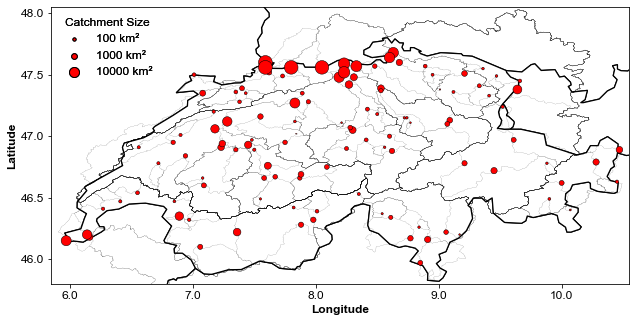

In [82]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 12          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')
import matplotlib.ticker as mticker

# Create a 2x1 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(9, 6))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
countries.plot(ax=axs, facecolor='white', edgecolor='k', linewidth=1.25, alpha=1)
#axs.set_xlim(-24, 45) 
#axs.set_ylim(35, 70)  
#ch_shapefile.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=1)

CAMELS_CH_Chem_catchments.plot(ax=axs, facecolor='None', edgecolor='black', linewidth=0.1,  alpha=1)

axs.set_xlim(5.85, 10.55) 
axs.set_ylim(45.8, 48.05)  

# Plot the gauges
#ch_shapefile.plot(ax=axs, facecolor='whitesmoke', edgecolor='black', linewidth=2)

# Compute sizes for scatter plot based on catchment area
size_factor = 1 # Adjust scaling factor as needed
catchment_areas = network_camels_ch_chem_gdf['area']  # Replace with actual column name
circle_sizes = size_factor * np.sqrt(catchment_areas)  # Use sqrt to scale more naturally

# Plot the gauges with circle size based on catchment area
sc = axs.scatter(
    network_camels_ch_chem_gdf['gauge_lon'], 
    network_camels_ch_chem_gdf['gauge_lat'], 
    color='red', edgecolor='black', linewidth=0.5,
    marker='o', s=circle_sizes, label="Streamflow gauges"
)

# Ensure aspect ratio is maintained
axs.set_aspect('equal')

# Legend for catchment sizes
legend_sizes = [100, 1000, 10000]  # Example catchment areas for legend
legend_labels = [f"{size} km²" for size in legend_sizes]
legend_circles = [plt.scatter([], [], s=size_factor * np.sqrt(size), color='red', edgecolor='black') for size in legend_sizes]

# Add custom legend for circle sizes
legend1 = axs.legend(
    legend_circles, legend_labels, loc='upper left', frameon=False, title="Catchment Size"
)
axs.add_artist(legend1)

axs.set_aspect('equal')  # Adjust aspect ratio as needed
#axs.spines['top'].set_visible(False)
#axs.spines['right'].set_visible(False)
#axs.spines['bottom'].set_visible(False)
#axs.spines['left'].set_visible(False)
#axs.set_axis_off()  # Turn off both x-axis and y-axis

    
#river_ch.plot(ax=axs, linewidth=0.2)

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')

# Format x-axis ticks to have one decimal place
axs.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Ensure y-axis ticks are spaced every 0.5 units
axs.yaxis.set_major_locator(mticker.MultipleLocator(0.5))

axs.set_ylabel("Latitude")
axs.set_xlabel("Longitude")
axs.set_aspect('equal')
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.savefig('results/figure1_pointsandboundaries.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

In [66]:
network_camels_ch_chem_gdf.columns

Index(['sensor_id', 'nawaf_id', 'nawat_id', 'isot_id', 'gauge_name',
       'water_body_name', 'gauge_easting', 'gauge_northing', 'gauge_lon',
       'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'bafu_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'bafu_nawat_dist',
       'q_nawat_corrector', 'remarks', 'geometry', 'x_coord', 'y_coord'],
      dtype='object')

In [83]:
import ee
ee.Authenticate()


Successfully saved authorization token.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


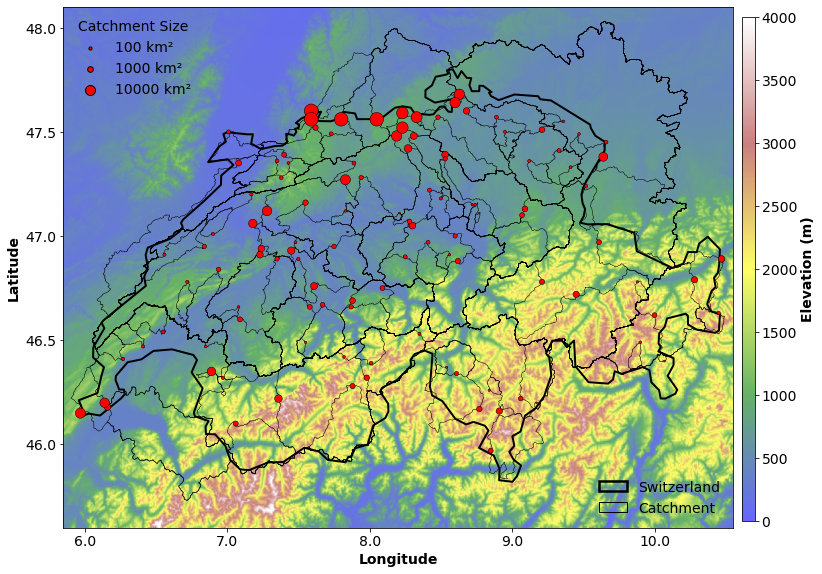

In [132]:
import ee
import geemap
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Initialize Earth Engine
ee.Initialize()

# Load the DEM dataset (SRTM 30m)
dem = ee.Image("USGS/SRTMGL1_003")

# Define a bounding box for Switzerland
switzerland_bbox = ee.Geometry.Rectangle([5.9559, 45.8179, 12, 48.8085])

# Define visualization parameters (color palette for topography)
topo_viz = {
    'min': 0,
    'max': 4000,  # Adjust max elevation
    'palette': ['blue', 'green', 'yellow', 'brown', 'white']  # Elevation color scale
}

# Generate a thumbnail image URL for Matplotlib
thumb_url = dem.visualize(**topo_viz).getThumbURL({
    'region': switzerland_bbox,
    'dimensions': '1024x1024',  # Adjust resolution as needed
    'format': 'png'
})

# Load Switzerland shapefile (if available)
# gdf = gpd.read_file("path/to/switzerland_shapefile.shp")  # Adjust path

# Set font properties
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

# Create figure and axis
fig, axs = plt.subplots(figsize=(12, 10))

# Set background color
axs.set_facecolor('white')

# Plot the DEM **directly from the URL** using `imshow()`
img = plt.imread(thumb_url)
axs.imshow(img, extent=[5.8, 10.6, 45.6, 48.1], alpha=0.6)  # Ensure correct alignment

# Overlay shapefile (if available)
#gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='black', linewidth=0.5, alpha=0.7)
ch_shapefile.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=2)

# Overlay river network
#river_ch.plot(ax=axs, linewidth=0.75, color="blue")



# Set axis limits
axs.set_xlim(5.85, 10.55)
axs.set_ylim(45.6, 48.1)

# Aspect ratio
axs.set_aspect('equal')

# Customize x and y-axis ticks
axs.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_locator(mticker.MultipleLocator(0.5))

# Add labels
axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")

# Add legend
axs.legend(loc='lower right', frameon=False)


# Define a custom colormap matching the DEM visualization
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import numpy as np

# Define a custom colormap based on the DEM visualization palette
cmap = mcolors.LinearSegmentedColormap.from_list("topo_cmap", topo_viz['palette'])

# Convert the colormap to an RGBA version
cmap_alpha = cmap(np.linspace(0, 1, 256))  # Get 256 discrete colors
cmap_alpha[:, -1] = 0.6  # Modify the alpha channel (last column)

# Create a new colormap with transparency
cmap = mcolors.ListedColormap(cmap_alpha)

norm = mcolors.Normalize(vmin=topo_viz['min'], vmax=topo_viz['max'])

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
from matplotlib.cm import ScalarMappable

cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

# Set colorbar label
cbar.set_label("Elevation (m)")

CAMELS_CH_Chem_catchments.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=0.5,  alpha=1)


# Compute sizes for scatter plot based on catchment area
size_factor = 1 # Adjust scaling factor as needed
catchment_areas = network_camels_ch_chem_gdf['area']  # Replace with actual column name
circle_sizes = size_factor * np.sqrt(catchment_areas)  # Use sqrt to scale more naturally

# Plot the gauges with circle size based on catchment area
sc = axs.scatter(
    network_camels_ch_chem_gdf['gauge_lon'], 
    network_camels_ch_chem_gdf['gauge_lat'], 
    color='red', edgecolor='black', linewidth=0.5,
    marker='o', s=circle_sizes, label="Streamflow gauges"
)

# Ensure aspect ratio is maintained
#axs.set_aspect('equal')

# Legend for catchment sizes
legend_sizes = [100, 1000, 10000]  # Example catchment areas for legend
legend_labels = [f"{size} km²" for size in legend_sizes]
legend_circles = [plt.scatter([], [], s=size_factor * np.sqrt(size), color='red', edgecolor='black') for size in legend_sizes]

# Existing legend for circle sizes
legend1 = axs.legend(
    legend_circles, legend_labels, loc='upper left', frameon=False, title="Catchment Size"
)

# Create rectangle patches for the legend
switzerland_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2.5, label='Switzerland')
catchment_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=1, label='Catchment')

# Add the rectangle patches as a second legend
axs.add_artist(legend1)  # Keep the first legend

axs.legend(
    handles=[switzerland_patch, catchment_patch],
    loc='lower right', frameon=False
)

plt.savefig('results/catchment_agregated_data.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

plt.show()

In [24]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\timeseries\daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp_sensor'].count()
    ec_count = df['ec_sensor'].count()
    o_count = df['O2C_sensor'].count()
    ph_count = df['pH_sensor'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_daily_df

100%|██████████| 87/87 [00:01<00:00, 71.54it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,14610,13945,14208,14138
2011,14610,13945,14208,14138
2016,14610,13115,13457,13129
2018,14610,6023,6235,6152
2019,14610,6023,6235,6152
...,...,...,...,...
2615,1678,13797,14265,14063
2617,6575,13797,14265,14063
2623,6575,5377,5520,5566


In [136]:
# Define the path where the CSV files are located
path = r"results/timeseries/hourly"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_hourly_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_hourly_df

100%|██████████| 87/87 [00:26<00:00,  3.32it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,429505,394170,399294,397636
2011,429505,394170,399294,397636
2016,429505,378348,379168,371028
2018,429505,205707,210556,208466
2019,429505,205707,210556,208466
...,...,...,...,...
2615,40272,386580,394295,387672
2617,181177,386580,394295,387672
2623,175297,172272,174936,176592


In [25]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    delta_2h_count = df['delta_2h'].count()
    delta_18o_count = df['delta_18o'].count()

    # Store the results as a tuple (or list)
    data.append([file_number, delta_2h_count, delta_18o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_isotopes_df = pd.DataFrame(data, columns=['camels_id', 'delta_2h_count', 'delta_18o_count']).set_index('camels_id')

counts_isotopes_df

100%|██████████| 9/9 [00:00<00:00, 288.62it/s]


,delta_2h_count,delta_18o_count
camels_id,,
2009,445,448
2016,434,437
2019,401,402
2030,300,301
2068,340,342
2174,157,157
2462,283,283
2473,382,385
2613,314,499


In [26]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 2  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values for all columns starting from the specified index
    counts = df.iloc[:, start_column_index:].count()
    
    # Store the file number and the counts as a row in the result
    row = [file_number] + counts.tolist()
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
columns = ['camels_id'] + df.columns[start_column_index:].tolist()  # Use the column names from the CSV file
counts_naduf_df = pd.DataFrame(data, columns=columns).set_index('camels_id')
counts_naduf_df

100%|██████████| 24/24 [00:00<00:00, 77.01it/s]


,alk,As,Ba,Br,Cd,Ca,Cl,Cr,Cu,doc,...,Sr,SO4,tfp,th,tn,toc,tp,tss,temp_sensor,Zn
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,1016,0,0,74,502,1013,1016,89,505,1012,...,0,1016,173,1014,996,983,1012,1010,1043,487
2016,977,0,0,334,102,979,985,0,104,978,...,0,980,16,975,949,941,963,975,1043,97
2018,383,0,0,19,49,382,389,0,52,363,...,0,389,54,382,389,346,383,383,417,46
2044,933,0,0,22,177,932,942,42,183,937,...,0,943,213,935,898,913,933,940,1027,173
2067,191,0,0,0,0,191,185,0,0,189,...,0,192,0,191,173,168,191,191,186,0
2068,380,0,0,0,0,379,381,0,0,376,...,0,381,80,380,368,352,375,380,388,0
2085,647,0,0,18,0,645,647,0,0,645,...,0,648,215,647,633,619,645,648,677,0
2091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,464,0,0,0,248,462,465,70,255,465,...,0,465,99,464,444,446,458,464,477,248


In [27]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_trend"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 2  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    # Count the number of non-null values for all columns starting from the specified index
    counts = df.iloc[:, start_column_index:].mean()
    
    # Store the file number and the counts as a row in the result
    row = [file_number] + counts.tolist()
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
columns = ['camels_id'] + df.columns[start_column_index:].tolist()  # Use the column names from the CSV file
mean_naduf_df = pd.DataFrame(data, columns=columns).set_index('camels_id')
mean_naduf_df

100%|██████████| 76/76 [00:01<00:00, 74.57it/s]


,Cl,q_max_kanton,q_min_kanton,q_mean_kanton,q_mean_sensor,doc,ec25_lab,ec25_sensor,tp,tn,...,NO2_N,drp,pH_lab,pH_sensor,O2_lab,O2_sensor,O2S_sensor,turbidity_sensor,temp_lab,temp_sensor
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,13.307034,NaN,NaN,NaN,170.288495,0.775237,337.622414,337.617500,0.122316,0.822000,...,0.013521,0.006212,8.176923,8.162552,11.424576,11.469410,100.585838,135.064382,7.805678,7.760127
2011,11.051102,NaN,NaN,102.870000,101.912948,0.961833,294.608333,NaN,0.150142,NaN,...,0.020400,0.010233,7.999167,NaN,11.045217,NaN,NaN,NaN,7.429386,6.957208
2016,10.625126,NaN,NaN,368.750000,297.063397,1.749580,379.857143,379.720174,0.040991,1.692437,...,0.011479,0.014252,8.055752,8.061395,10.501770,10.513754,101.216317,NaN,12.453805,12.454387
2018,6.119417,151.029861,127.560278,136.965000,135.308479,1.612417,267.475000,262.962069,0.025158,1.048750,...,0.008875,0.008742,8.313333,8.250862,10.458333,10.702586,105.177690,NaN,12.567500,12.539650
2019,1.150698,NaN,NaN,NaN,42.696556,0.536385,115.151042,NaN,0.044656,0.435750,...,0.004792,0.005146,8.187500,NaN,11.825000,NaN,NaN,NaN,6.592708,6.365885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,8.070000,NaN,NaN,1.688125,1.560876,2.151532,436.655462,NaN,0.058136,1.996949,...,0.008874,0.014890,8.314286,NaN,NaN,NaN,NaN,NaN,9.307627,9.594296
2610,3.365750,NaN,NaN,1.476917,1.468095,1.813417,412.325000,NaN,0.030856,2.108448,...,0.004817,0.010575,8.140000,NaN,10.823333,NaN,NaN,NaN,9.687500,NaN
2613,11.949583,NaN,NaN,1533.800000,1038.862909,1.787500,354.028846,352.947250,0.042925,1.399000,...,0.011400,0.013883,8.076923,8.059933,10.674038,10.624882,102.307529,9.501667,13.065690,13.023550


In [28]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_trend"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []
all_columns = set()

# First pass: Collect all unique column names starting from the specified index
for file in tqdm.tqdm(csv_files):
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    # Collect all unique column names from the specified index
    all_columns.update(df.columns[start_column_index:])

# Convert the set of columns to a sorted list
all_columns = sorted(all_columns)

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, start_column_index:]
    
    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Count the non-null values and assign to the corresponding column
    for col in all_columns:
        row[col] = filtered_df[col].count() if col in filtered_df.columns else 0
    
    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
counts_nawa_df = pd.DataFrame(data).set_index('camels_id')

100%|██████████| 76/76 [00:00<00:00, 276.20it/s]


In [29]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_trend"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []
all_columns = set()

# First pass: Collect all unique column names starting from the specified index
for file in tqdm.tqdm(csv_files):
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    # Collect all unique column names from the specified index
    all_columns.update(df.columns[start_column_index:])

# Convert the set of columns to a sorted list
all_columns = sorted(all_columns)

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, start_column_index:]
    
    # Here we take out the > or < before converting to a numeric value:
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Count the non-null values and assign to the corresponding column
    for col in all_columns:
        row[col] = filtered_df[col].mean() if col in filtered_df.columns else 0
    
    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_df = pd.DataFrame(data).set_index('camels_id')
mean_nawa_df


100%|██████████| 76/76 [00:00<00:00, 77.33it/s]


,Cl,NH4_N,NO2_N,NO3_N,O2S_sensor,O2_lab,O2_sensor,doc,drp,ec25_lab,...,pH_sensor,q_max_kanton,q_mean_kanton,q_mean_sensor,q_min_kanton,temp_lab,temp_sensor,tn,tp,turbidity_sensor
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,13.307034,0.114534,0.013521,0.600873,100.585838,11.424576,11.469410,0.775237,0.006212,337.622414,...,8.162552,NaN,NaN,170.288495,NaN,7.805678,7.760127,0.822000,0.122316,135.064382
2011,11.051102,0.177892,0.020400,0.634850,NaN,11.045217,NaN,0.961833,0.010233,294.608333,...,NaN,NaN,102.870000,101.912948,NaN,7.429386,6.957208,NaN,0.150142,NaN
2016,10.625126,0.025924,0.011479,1.572101,101.216317,10.501770,10.513754,1.749580,0.014252,379.857143,...,8.061395,NaN,368.750000,297.063397,NaN,12.453805,12.454387,1.692437,0.040991,NaN
2018,6.119417,0.031300,0.008875,0.873050,105.177690,10.458333,10.702586,1.612417,0.008742,267.475000,...,8.250862,151.029861,136.965000,135.308479,127.560278,12.567500,12.539650,1.048750,0.025158,NaN
2019,1.150698,0.018333,0.004792,0.324885,NaN,11.825000,NaN,0.536385,0.005146,115.151042,...,NaN,NaN,NaN,42.696556,NaN,6.592708,6.365885,0.435750,0.044656,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,8.070000,0.030176,0.008874,1.867983,NaN,NaN,NaN,2.151532,0.014890,436.655462,...,NaN,NaN,1.688125,1.560876,NaN,9.307627,9.594296,1.996949,0.058136,NaN
2610,3.365750,0.019650,0.004817,1.804000,NaN,10.823333,NaN,1.813417,0.010575,412.325000,...,NaN,NaN,1.476917,1.468095,NaN,9.687500,NaN,2.108448,0.030856,NaN
2613,11.949583,0.040083,0.011400,1.234583,102.307529,10.674038,10.624882,1.787500,0.013883,354.028846,...,8.059933,NaN,1533.800000,1038.862909,NaN,13.065690,13.023550,1.399000,0.042925,9.501667


In [30]:
counts_nawa_df

,Cl,NH4_N,NO2_N,NO3_N,O2S_sensor,O2_lab,O2_sensor,doc,drp,ec25_lab,...,pH_sensor,q_max_kanton,q_mean_kanton,q_mean_sensor,q_min_kanton,temp_lab,temp_sensor,tn,tp,turbidity_sensor
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,118,118,117,118,117,118,117,118,118,116,...,116,0,0,118,0,118,118,116,117,89
2011,118,120,120,120,0,115,0,120,120,120,...,0,0,108,120,0,114,120,0,120,0
2016,119,119,119,119,114,113,114,119,119,112,...,114,0,4,119,0,113,119,119,107,0
2018,120,120,120,120,29,24,29,120,120,120,...,29,72,72,120,72,120,120,24,120,0
2019,96,96,96,96,0,96,0,96,96,96,...,0,0,0,96,0,96,96,96,96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,119,119,119,119,0,0,0,124,118,119,...,0,0,48,124,0,118,115,59,118,0
2610,120,120,120,120,0,120,0,120,120,120,...,0,0,120,120,0,120,0,58,118,0
2613,120,120,120,120,119,104,119,120,120,104,...,120,0,5,120,0,116,120,120,120,6


## Now we can process some means

In [33]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\timeseries\daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))


    # Count the number of non-null values in each column
    temp_mean = df['temp_sensor'].mean()
    ec_mean = df['ec_sensor'].mean()
    o_mean = df['O2C_sensor'].mean()
    ph_mean = df['pH_sensor'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean', 'ph_mean', 'EC_mean', 'o_mean']).set_index('camels_id')

mean_bafu_daily_df

100%|██████████| 87/87 [00:13<00:00,  6.62it/s]


,temp_mean,ph_mean,EC_mean,o_mean
camels_id,,,,
2009,7.320306,8.091369,290.656359,11.438225
2011,6.993472,8.091369,290.656359,11.438225
2016,12.009385,8.023153,377.401069,10.366171
2018,11.870272,8.087549,262.998814,10.394436
2019,5.994370,8.087549,262.998814,10.394436
...,...,...,...,...
2615,12.578869,8.041995,359.599735,10.592674
2617,5.718993,8.041995,359.599735,10.592674
2623,3.796978,7.922618,300.627899,9.925759


In [144]:
mean_bafu_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean
temp_mean,1.000000,0.012079,-0.009242,0.034931
ph_mean,0.012079,1.000000,0.317189,0.267072
EC_mean,-0.009242,0.317189,1.000000,-0.433422
o_mean,0.034931,0.267072,-0.433422,1.000000


In [145]:
df.columns

Index(['temp', 'ph', 'EC', 'o'], dtype='object')

In [32]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))

    # Count the number of non-null values in each column
    temp_mean = df['temp_sensor'].mean()
    ec_mean = df['ec20_lab'].mean()
    o_mean = df['O2C_sensor'].mean()
    ph_mean = df['pH_lab'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:17<00:00,  1.40it/s]


,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
camels_id,,,,
2009,7.309847,7.734457,262.178556,11.440294
2016,11.988522,8.238711,337.461352,10.406077
2018,12.005156,8.044560,238.703640,10.357727
2044,10.829776,8.326537,409.558566,10.755680
2067,5.364746,8.050961,232.331349,NaN
2068,9.134923,7.550427,237.085454,11.209862
2085,12.105036,8.040296,302.748807,10.236686
2091,NaN,NaN,NaN,NaN
2106,10.809791,8.346294,413.256103,NaN


In [147]:
mean_naduf_daily_df.corr()

,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
temp_mean_naduf,1.000000,0.616923,0.397307,-0.448336
ph_mean_naduf,0.616923,1.000000,0.646550,-0.340761
EC_mean_naduf,0.397307,0.646550,1.000000,-0.234656
o_mean_naduf,-0.448336,-0.340761,-0.234656,1.000000


In [31]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))
    
    # Count the number of non-null values in each column
    temp_mean = df['temp_sensor'].mean()
    ec_mean = df['ec25_lab'].mean()
    o_mean = df['O2_lab'].mean()
    ph_mean = df['pH_sensor'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']).set_index('camels_id')

mean_nawa_daily_df

100%|██████████| 76/76 [00:14<00:00,  5.40it/s]


,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,
2009,7.760127,8.162552,337.622414,11.424576
2011,6.948118,NaN,293.205882,11.046930
2016,12.454387,8.061395,379.857143,10.501770
2018,12.539650,8.250862,267.475000,10.458333
2019,6.365422,NaN,114.977108,11.823494
...,...,...,...,...
2493,9.505870,NaN,440.192063,NaN
2610,NaN,NaN,412.560345,10.828017
2613,13.023550,8.059933,354.028846,10.674038


In [149]:
mean_nawa_daily_df.corr()

,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
temp_mean_nawa,1.000000,0.359468,0.372695,-0.684473
ph_mean_nawa,0.359468,1.000000,0.481345,0.210796
EC_mean_nawa,0.372695,0.481345,1.000000,-0.003770
o_mean_nawa,-0.684473,0.210796,-0.003770,1.000000


In [34]:
mean_daily_df = mean_bafu_daily_df.copy()
mean_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']] = mean_naduf_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']]
mean_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']] = mean_nawa_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']]

mean_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,,,,,,,,,
2009,7.320306,8.091369,290.656359,11.438225,7.309847,7.734457,262.178556,11.440294,7.760127,8.162552,337.622414,11.424576
2011,6.993472,8.091369,290.656359,11.438225,NaN,NaN,NaN,NaN,6.948118,NaN,293.205882,11.046930
2016,12.009385,8.023153,377.401069,10.366171,11.988522,8.238711,337.461352,10.406077,12.454387,8.061395,379.857143,10.501770
2018,11.870272,8.087549,262.998814,10.394436,12.005156,8.044560,238.703640,10.357727,12.539650,8.250862,267.475000,10.458333
2019,5.994370,8.087549,262.998814,10.394436,NaN,NaN,NaN,NaN,6.365422,NaN,114.977108,11.823494
...,...,...,...,...,...,...,...,...,...,...,...,...
2615,12.578869,8.041995,359.599735,10.592674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2617,5.718993,8.041995,359.599735,10.592674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2623,3.796978,7.922618,300.627899,9.925759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils.plots import add_circular_legend, plot_variable_subplot, generate_legend_and_color_mapping
import math

In [36]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'sans-serif'  # Change the font family
mpl.rcParams['font.size'] = 16        # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

In [37]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawat_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_nawaf_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

color_categories_Cl = [(-np.inf, 5), (5, 7.5), (7.5, 10), (10, 12.5), (12.5, np.inf)]
color_categories_alk = [(-np.inf, 2), (2, 3), (3, 4), (4, 5), (5, np.inf)]
color_categories_NO3_N = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_SO4 = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_NO2_N = [(-np.inf, 0.01), (0.01, 0.02), (0.02, 0.03), (0.03, 0.04), (0.04, np.inf)]
color_categories_NH4_N = [(-np.inf, 0.025), (0.025, 0.05), (0.05, 0.075), (0.075, 0.1), (0.1, np.inf)]

color_categories_tp = [(-np.inf, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.08), (0.08, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "bafu_nawat_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_bafu_nawat_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "bafu_nawaf_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_bafu_nawaf_dist, 0, 2, 0.5, 10, color_palette='custom'),

    "Cl":  generate_legend_and_color_mapping("Cl [mg/l]", color_categories_Cl, 0, 30, 1, 10),
    "alk":  generate_legend_and_color_mapping("Alk. [mmol/l]", color_categories_alk, 0, 350, 50, 10, color_palette='custom'),
    "NO3_N":  generate_legend_and_color_mapping("NO3 [mg/l]", color_categories_NO3_N, 0, 150, 1, 10, color_palette='custom'),
    "SO4":  generate_legend_and_color_mapping("SO4 [mg/l]", color_categories_SO4, 0, 10, 1, 10, color_palette='blues'),
    "NO2_N":  generate_legend_and_color_mapping("NO2 [mg/l]", color_categories_NO2_N, 0, 10, 1, 10, color_palette='custom'),
    "NH4_N": generate_legend_and_color_mapping("NH4 [mg/l]", color_categories_NH4_N, 0, 5, 1, 10, color_palette='custom'),
    "tp":  generate_legend_and_color_mapping("Total P [mg/l]", color_categories_tp, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}




def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Create a histogram inset axis within the subplot
    hist_ax = ax.inset_axes([0.05, 0.15, 0.15, 0.175])  # Adjust the values as needed

    # Extract the data for the histogram
    hist_data = estreams_attributes[variable].dropna()

    # Plot the histogram with manually controlled uniform bins
    counts, bins, patches = hist_ax.hist(hist_data, bins=hist_bins, color='white', edgecolor='black', alpha=0.7, linewidth=0.4)

    # Assign colors based on color_categories to the bins
    for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
        # Iterate through color categories and check if the bin falls within the category
        for low, high in color_categories:
            if low <= bin_left < high:
                patch.set_facecolor(color_mapping[f'{low}-{high}'])
                break
        # For bins beyond the last threshold, use the color for the last defined category
        if bin_left >= color_categories[-1][0]:
            patch.set_facecolor(color_mapping[f'{color_categories[-1][0]}-{np.inf}'])

    # Hide the axis spines and ticks for the inset axis
    hist_ax.spines['top'].set_visible(False)
    hist_ax.spines['right'].set_visible(False)
    hist_ax.spines['left'].set_visible(True)
    hist_ax.spines['bottom'].set_visible(True)
    hist_ax.set_facecolor('none')
    hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=12)

    # Get the x-axis limits
    x_min, x_max = hist_ax.get_xlim()

    # Compute the midpoint of the x-axis
    middle_tick = (x_min + x_max) / 2

    # Set x-ticks to show only the middle tick
    hist_ax.set_xticks([middle_tick])

    # Set the label for the middle tick
    hist_ax.set_xticklabels([f'{middle_tick:.1f}'], fontsize=8, fontweight="bold")

    hist_ax.set_ylabel("Count", fontsize=8, fontweight="bold")

    # Set custom y-axis ticks to show automatically but label only the middle one
    y_ticks = hist_ax.get_yticks()
    mid_tick = y_ticks[len(y_ticks) // 2]
    hist_ax.set_yticks([mid_tick])  # Set only the middle tick
    hist_ax.set_yticklabels([f'{mid_tick:.0f}'], fontsize=8, fontweight="bold")

    # Call the function to add a circular legend
    add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [155]:
mean_bafu_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_naduf_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]
mean_nawa_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]


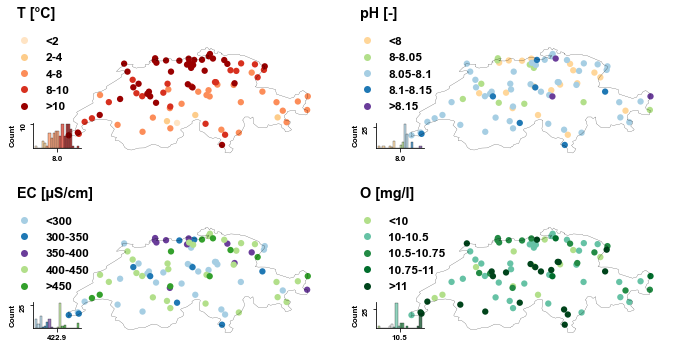

In [83]:
# List of variables
variable_list = ["temp_mean", "ph_mean", "EC_mean", "o_mean"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_bafu_daily_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [107]:
mean_naduf_df

,alk,As,Ba,Br,Cd,Ca,Cl,Cr,Cu,doc,...,tn,toc,tp,tss,temp_online,Zn,lat,lon,geometry,color_category
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,1.451581,NaN,NaN,0.053143,0.092978,41.738307,9.739576,2.178736,3.289861,0.951516,...,0.871096,2.357983,0.098988,116.110269,7.331974,19.213961,46.349564,6.888617,POINT (6.88862 46.34956),7.5-10
2016,3.032536,NaN,NaN,0.058378,0.078039,61.245874,9.796727,NaN,2.082692,2.414664,...,2.112852,3.516235,0.062301,15.272072,12.050905,10.387629,47.482537,8.194880,POINT (8.19488 47.48254),7.5-10
2018,2.273442,NaN,NaN,0.051105,0.094082,43.801768,4.501529,NaN,2.076923,2.198422,...,1.363066,3.296518,0.062242,22.304061,12.050659,20.326087,47.421030,8.271271,POINT (8.27127 47.42103),-inf-5
2044,4.073803,NaN,NaN,0.060627,0.105268,66.718579,15.278358,1.393048,3.976030,2.931250,...,3.131390,5.129884,0.160630,70.890989,10.862653,17.271935,47.596523,8.681980,POINT (8.68198 47.59652),12.5-inf
2067,1.496126,NaN,NaN,NaN,NaN,36.771749,1.082919,NaN,NaN,0.853968,...,0.657990,2.567560,0.071079,52.226702,5.421894,NaN,46.885784,10.465420,POINT (10.46542 46.88578),-inf-5
2068,1.027535,NaN,NaN,NaN,NaN,37.535529,3.223818,NaN,NaN,0.985439,...,1.162975,1.664849,0.032536,16.405425,9.171399,NaN,46.163386,8.910326,POINT (8.91033 46.16339),-inf-5
2085,2.640270,NaN,NaN,0.050000,NaN,56.727638,5.947604,NaN,NaN,1.634466,...,1.431032,2.344442,0.028911,13.682472,12.157995,NaN,47.055592,7.184345,POINT (7.18435 47.05559),5-7.5
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,47.560711,7.799896,POINT (7.79990 47.56071),NaN
2106,4.130583,NaN,NaN,NaN,0.074566,87.033254,10.711663,1.289707,5.974501,2.231562,...,3.298500,4.094057,0.126212,33.456866,10.843690,46.660296,47.518322,7.618783,POINT (7.61878 47.51832),10-12.5


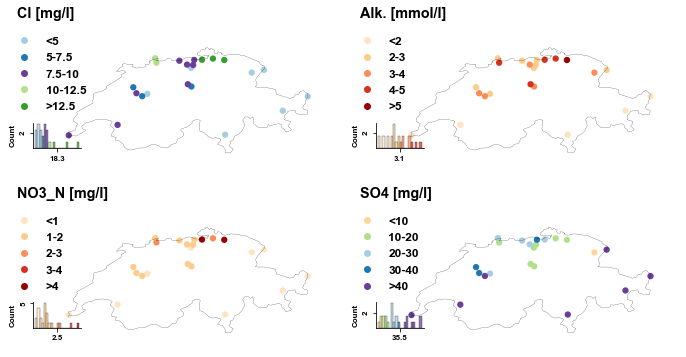

In [110]:
# List of variables
variable_list = ["Cl", "alk", "NO3_N", "SO4"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_naduf_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

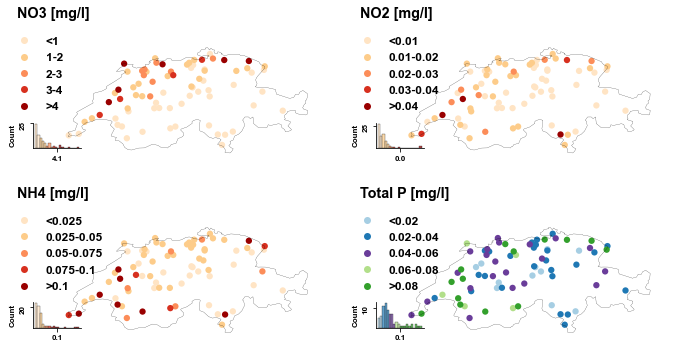

In [115]:
# List of variables
variable_list = ["NO3_N", "NO2_N", "NH4_N", "tp"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_nawa_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

TypeError: plot_variable_subplot() got an unexpected keyword argument 'minx'

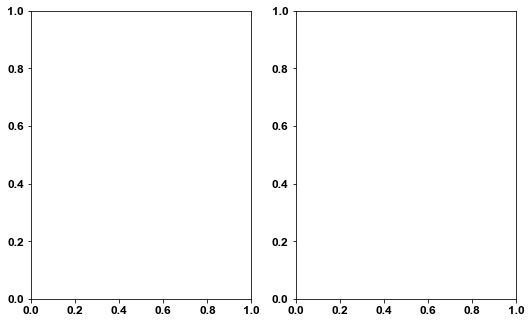

In [56]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_T_comparison_maps_naDUF.png', dpi=300, bbox_inches='tight')


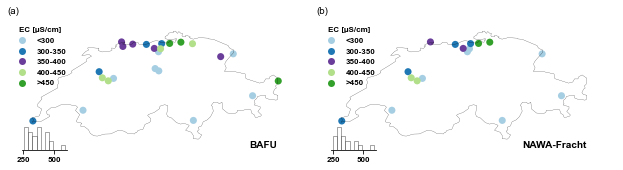

In [396]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_comparison_maps_naDUF.png', dpi=300, bbox_inches='tight')


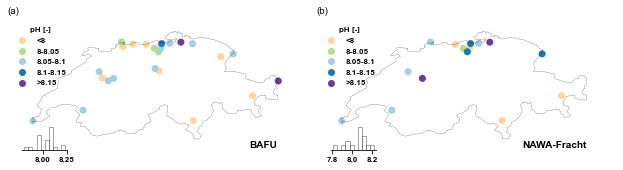

In [380]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

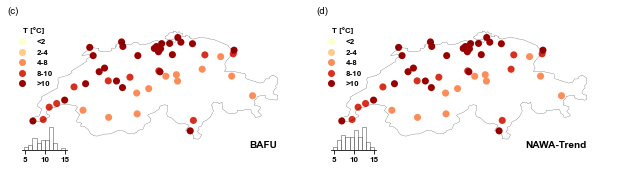

In [395]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_T_comparison_maps_nawa.png', dpi=300, bbox_inches='tight')


In [382]:
mean_daily_df[["temp_mean", "temp_mean_naduf", "temp_mean_nawa"]].corr()

,temp_mean,temp_mean_naduf,temp_mean_nawa
temp_mean,1.000000,0.989333,0.974194
temp_mean_naduf,0.989333,1.000000,0.972547
temp_mean_nawa,0.974194,0.972547,1.000000


In [383]:
mean_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa,lat,lon
temp_mean,1.000000,0.012079,-0.009242,0.034931,0.989333,0.198936,0.353995,-0.456665,0.974194,0.162681,0.447725,-0.698845,0.501924,-0.383678
ph_mean,0.012079,1.000000,0.317189,0.267072,0.028930,0.872771,0.369501,-0.007110,0.216536,0.057491,0.142727,-0.353707,-0.087271,-0.044877
EC_mean,-0.009242,0.317189,1.000000,-0.433422,0.175399,0.243596,0.930079,-0.398266,0.158783,0.279408,0.363101,-0.005201,0.119229,0.072960
o_mean,0.034931,0.267072,-0.433422,1.000000,-0.344702,0.001012,-0.325204,0.938969,-0.193989,-0.131704,-0.183367,0.126692,-0.182268,-0.104392
temp_mean_naduf,0.989333,0.028930,0.175399,-0.344702,1.000000,0.240531,0.359985,-0.448336,0.972547,0.086965,0.326856,-0.478506,0.468266,-0.573730
ph_mean_naduf,0.198936,0.872771,0.243596,0.001012,0.240531,1.000000,0.396994,0.159371,0.221945,0.755128,0.496991,-0.216398,0.374914,-0.241622
EC_mean_naduf,0.353995,0.369501,0.930079,-0.325204,0.359985,0.396994,1.000000,-0.222642,0.318323,0.485068,0.988565,-0.163345,0.410883,-0.100573
o_mean_naduf,-0.456665,-0.007110,-0.398266,0.938969,-0.448336,0.159371,-0.222642,1.000000,-0.440817,-0.232938,-0.181972,0.888451,-0.263147,0.123504
temp_mean_nawa,0.974194,0.216536,0.158783,-0.193989,0.972547,0.221945,0.318323,-0.440817,1.000000,0.116919,0.346879,-0.697375,0.396259,-0.155738
ph_mean_nawa,0.162681,0.057491,0.279408,-0.131704,0.086965,0.755128,0.485068,-0.232938,0.116919,1.000000,0.191577,-0.018017,0.175317,-0.030963


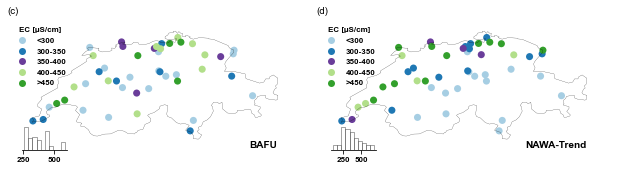

In [394]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_comparison_maps_nawa.png', dpi=300, bbox_inches='tight')


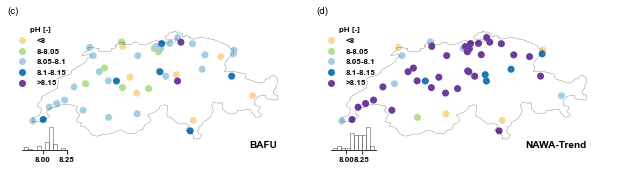

In [385]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

# Make a plot with the time-series

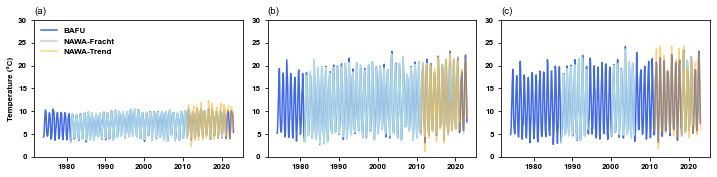

In [408]:
# List of basins to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['temp'], label='BAFU', color='royalblue')
    axes[i].plot(naduf_daily.index, naduf_daily['temp_water'], label='NAWA-Fracht', color='lightblue')
    axes[i].plot(nawa_daily.index, nawa_daily['temp_water'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(97+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('Temperature (°C)')
        axes[i].legend(frameon=False, loc="upper left")
        
    axes[i].grid(False)
    axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_T_timeseries.png', dpi=300, bbox_inches='tight')


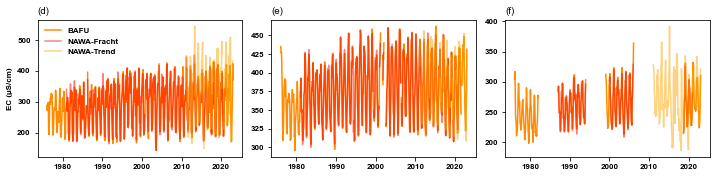

In [407]:
# List of basins to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['EC'], label='BAFU', color='darkorange')
    axes[i].plot(naduf_daily.index, naduf_daily['EC'], label='NAWA-Fracht', color='red', alpha=0.5)
    axes[i].plot(nawa_daily.index, nawa_daily['EC'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(100+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('EC (µS/cm)')
        axes[i].legend(frameon=False, loc="upper left")
    
    axes[i].grid(False)
    #axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_timeseries.png', dpi=300, bbox_inches='tight')


In [338]:
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (557660.000 133280.000)
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (593770.000 118630.000)
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (657000.000 259360.000)
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (662830.000 252580.000)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (649930.000 177380.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (830800.000 168700.000)
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (669900.000 154075.000)
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (663700.000 213630.000)
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (700710.000 218125.000)


In [116]:
mean_naduf_df.corr()

,alk,As,Ba,Br,Cd,Ca,Cl,Cr,Cu,doc,...,tfp,th,tn,toc,tp,tss,temp_online,Zn,lat,lon
alk,1.000000,NaN,1.0,0.064030,0.052686,0.935123,0.644829,0.120768,0.699116,0.872686,...,0.780126,0.957781,0.793658,0.902414,0.550651,-0.076829,0.437707,0.466232,0.607526,-0.118092
As,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba,1.000000,NaN,1.0,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,...,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
Br,0.064030,NaN,1.0,1.000000,-0.279405,0.110019,0.085425,0.066195,0.067916,0.027269,...,0.104223,0.047505,0.031156,0.072665,0.014728,-0.003815,0.125813,0.023647,-0.061750,-0.241673
Cd,0.052686,NaN,-1.0,-0.279405,1.000000,0.013801,0.438018,0.303695,0.321841,0.242744,...,0.480046,0.181062,0.403403,0.248344,0.636060,0.151326,-0.379191,0.217440,-0.282720,0.523802
Ca,0.935123,NaN,1.0,0.110019,0.013801,1.000000,0.517299,0.203261,0.823844,0.800191,...,0.680179,0.938992,0.708273,0.835987,0.451778,-0.096819,0.363232,0.676433,0.426807,-0.256203
Cl,0.644829,NaN,1.0,0.085425,0.438018,0.517299,1.000000,0.289925,0.537858,0.574459,...,0.778340,0.705552,0.921254,0.535427,0.829605,-0.115412,0.465071,0.175681,0.415462,-0.112301
Cr,0.120768,NaN,-1.0,0.066195,0.303695,0.203261,0.289925,1.000000,0.633289,0.035847,...,0.210702,0.170666,0.237632,0.320188,0.526395,0.847666,-0.140797,0.524992,-0.364870,-0.568775
Cu,0.699116,NaN,-1.0,0.067916,0.321841,0.823844,0.537858,0.633289,1.000000,0.453293,...,0.585045,0.768812,0.726747,0.695971,0.763690,0.318403,0.093969,0.888335,0.151022,-0.308630
doc,0.872686,NaN,1.0,0.027269,0.242744,0.800191,0.574459,0.035847,0.453293,1.000000,...,0.788950,0.785605,0.676137,0.902369,0.508065,-0.226407,0.467135,0.186563,0.502329,-0.124927


# Count number of measurments (variables)

In [156]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,geometry,x_coord,y_coord
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,Porte du Scex,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,POINT (-0.16384 44.89064),-0.163844,44.890639
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,Sion,593277.0,118449.0,3372.417040,0.0,1.000005,NaN,POINT (-0.16384 44.89064),-0.163838,44.890638
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,Brugg,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,POINT (-0.16383 44.89065),-0.163829,44.890650
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,POINT (-0.16383 44.89065),-0.163828,44.890650
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN,POINT (-0.16383 44.89064),-0.163829,44.890643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.16380 44.89064),-0.163799,44.890644
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.16383 44.89064),-0.163826,44.890642
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,Emmen-Littau,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,POINT (-0.16383 44.89065),-0.163827,44.890646


In [157]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_df = pd.DataFrame(data, columns=['camels_id', 'count_bafu']).set_index('camels_id')

counts_datasets_df = pd.DataFrame(index=network_camels_ch_chem_gdf.index)

counts_datasets_df["count_bafu"] = counts_bafu_df["count_bafu"]
counts_datasets_df

100%|██████████| 87/87 [00:06<00:00, 13.67it/s]


,count_bafu
gauge_id,
2009,4.0
2011,4.0
2016,4.0
2018,4.0
2019,4.0
...,...
2617,4.0
2623,4.0
2634,4.0


In [158]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_naduf"] = data_df["count"]

counts_datasets_df

100%|██████████| 24/24 [00:00<00:00, 37.19it/s]


,count_bafu,count_naduf
gauge_id,,
2009,4.0,35.0
2011,4.0,NaN
2016,4.0,32.0
2018,4.0,32.0
2019,4.0,NaN
...,...,...
2617,4.0,NaN
2623,4.0,NaN
2634,4.0,23.0


In [159]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_nawa"] = data_df["count"]

counts_datasets_df

100%|██████████| 76/76 [00:00<00:00, 89.48it/s]


,count_bafu,count_naduf,count_nawa
gauge_id,,,
2009,4.0,35.0,19.0
2011,4.0,NaN,14.0
2016,4.0,32.0,19.0
2018,4.0,32.0,21.0
2019,4.0,NaN,14.0
...,...,...,...
2617,4.0,NaN,NaN
2623,4.0,NaN,NaN
2634,4.0,23.0,13.0


In [160]:
# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_isot"] = data_df["count"]

counts_datasets_df

100%|██████████| 9/9 [00:00<00:00, 157.43it/s]


,count_bafu,count_naduf,count_nawa,count_isot
gauge_id,,,,
2009,4.0,35.0,19.0,2.0
2011,4.0,NaN,14.0,NaN
2016,4.0,32.0,19.0,2.0
2018,4.0,32.0,21.0,NaN
2019,4.0,NaN,14.0,2.0
...,...,...,...,...
2617,4.0,NaN,NaN,NaN
2623,4.0,NaN,NaN,NaN
2634,4.0,23.0,13.0,NaN


In [161]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,geometry,x_coord,y_coord
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,Porte du Scex,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,POINT (-0.16384 44.89064),-0.163844,44.890639
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,Sion,593277.0,118449.0,3372.417040,0.0,1.000005,NaN,POINT (-0.16384 44.89064),-0.163838,44.890638
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,Brugg,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,POINT (-0.16383 44.89065),-0.163829,44.890650
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,POINT (-0.16383 44.89065),-0.163828,44.890650
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN,POINT (-0.16383 44.89064),-0.163829,44.890643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.16380 44.89064),-0.163799,44.890644
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.16383 44.89064),-0.163826,44.890642
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,Emmen-Littau,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,POINT (-0.16383 44.89065),-0.163827,44.890646


In [162]:
counts_datasets_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
counts_datasets_df

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon
gauge_id,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89
2011,4.0,NaN,14.0,NaN,46.22,7.36
2016,4.0,32.0,19.0,2.0,47.48,8.19
2018,4.0,32.0,21.0,NaN,47.42,8.27
2019,4.0,NaN,14.0,2.0,46.75,8.09
...,...,...,...,...,...,...
2617,4.0,NaN,NaN,NaN,46.63,10.45
2623,4.0,NaN,NaN,NaN,46.53,8.35
2634,4.0,23.0,13.0,NaN,47.07,8.28


In [163]:
river_ch = gpd.read_file('data/shps/rivers_ch_dissolved.shp')
river_ch

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,21000049,18.849608,13.158794,1.432472,0.003752,237.841082,2,70.8,0.003752,21000042,2,21000331,21000340,0,0,"MULTILINESTRING ((5.96154 46.13500, 5.96167 46..."


In [49]:
#Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 14), (14, 16), (16, 18), (18, 20), (20, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawa_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_naduf_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("Sensors [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "foen_nawat_dist": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_nawa_distance, 0, 2, 0.5, 10, color_palette='custom'),
    "foen_nawaf_dist": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_naduf_distance, 0, 2, 0.5, 10, color_palette='custom'),
}


def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Call the function to add a circular legend
    add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

<AxesSubplot:>

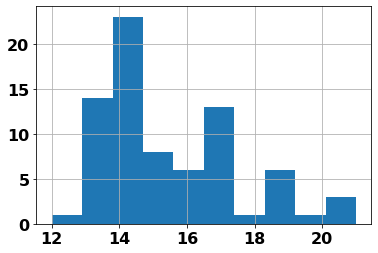

In [165]:
counts_datasets_df.count_nawa.hist()

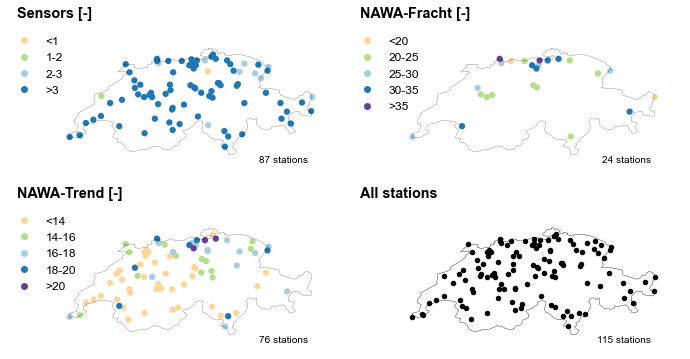

In [313]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "115 stations"]

for i, variable in enumerate(variable_list):
    if variable == "count_isot":
        axs[i].scatter(network_camels_ch_chem_gdf['gauge_lon'], network_camels_ch_chem_gdf['gauge_lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=20, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("All stations", loc="left", fontweight="bold")


    else:
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)
        legend_title = color_mapping_list[variable][0]
            
    
        axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)
        
    #river_ch.plot(ax=axs[i], linewidth=0.25)
        
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
            transform=axs[i].transAxes, fontsize=10)

    axs[i].set_aspect('equal')
    axs[i].set_aspect('equal')


# Adjust layout and remove space between subplots
plt.tight_layout()

#fig.savefig(r'results\fig_plots_v02.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon,geometry,color_category
gauge_id,,,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89,POINT (6.89000 46.35000),18-20
2016,4.0,32.0,19.0,2.0,47.48,8.19,POINT (8.19000 47.48000),18-20
2019,4.0,NaN,14.0,2.0,46.75,8.09,POINT (8.09000 46.75000),-inf-14
2030,4.0,NaN,14.0,2.0,46.76,7.61,POINT (7.61000 46.76000),-inf-14
2068,4.0,25.0,19.0,2.0,46.16,8.91,POINT (8.91000 46.16000),18-20
2174,4.0,27.0,18.0,2.0,46.15,5.97,POINT (5.97000 46.15000),16-18
2462,4.0,33.0,17.0,2.0,46.62,10.00,POINT (10.00000 46.62000),16-18
2473,4.0,27.0,19.0,2.0,47.38,9.64,POINT (9.64000 47.38000),18-20
2613,4.0,38.0,20.0,2.0,47.60,7.59,POINT (7.59000 47.60000),18-20


,count_bafu,count_naduf,count_nawa,count_isot,lat,lon,geometry,color_category,category_bafu
gauge_id,,,,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89,POINT (6.89000 46.35000),18-20,4
2016,4.0,32.0,19.0,2.0,47.48,8.19,POINT (8.19000 47.48000),18-20,4
2019,4.0,NaN,14.0,2.0,46.75,8.09,POINT (8.09000 46.75000),-inf-14,4
2030,4.0,NaN,14.0,2.0,46.76,7.61,POINT (7.61000 46.76000),-inf-14,4
2068,4.0,25.0,19.0,2.0,46.16,8.91,POINT (8.91000 46.16000),18-20,4
2174,4.0,27.0,18.0,2.0,46.15,5.97,POINT (5.97000 46.15000),16-18,4
2462,4.0,33.0,17.0,2.0,46.62,10.00,POINT (10.00000 46.62000),16-18,4
2473,4.0,27.0,19.0,2.0,47.38,9.64,POINT (9.64000 47.38000),18-20,4
2613,4.0,38.0,20.0,2.0,47.60,7.59,POINT (7.59000 47.60000),18-20,4


In [168]:
# Function to categorize values into groups
def categorize(value):
    if value == 1:
        return '#FFD699'
    elif 1 < value <= 2:
        return '#b2df8a'
    elif 2 < value <= 3:
        return '#a6cee3'
    elif value == 4:
        return '#1f78b4'
    else:
        return 'Other'

df_bafu = counts_datasets_df[counts_datasets_df.count_bafu.notna()]

# Apply the categorization function
df_bafu['color_bafu'] = df_bafu['count_bafu'].apply(categorize)
df_bafu

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon,color_bafu
gauge_id,,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89,#1f78b4
2011,4.0,NaN,14.0,NaN,46.22,7.36,#1f78b4
2016,4.0,32.0,19.0,2.0,47.48,8.19,#1f78b4
2018,4.0,32.0,21.0,NaN,47.42,8.27,#1f78b4
2019,4.0,NaN,14.0,2.0,46.75,8.09,#1f78b4
...,...,...,...,...,...,...,...
2615,4.0,NaN,NaN,NaN,47.56,7.59,#1f78b4
2617,4.0,NaN,NaN,NaN,46.63,10.45,#1f78b4
2623,4.0,NaN,NaN,NaN,46.53,8.35,#1f78b4


In [254]:
counts_bafu_df

,count_bafu
camels_id,
2009,4
2011,4
2016,4
2018,4
2019,4
...,...
2615,4
2617,4
2623,4


In [252]:
counts_isotopes_df

,delta_2h_count,delta_18o_count
camels_id,,
2009,445,448
2016,434,437
2019,401,402
2030,300,301
2068,340,342
2174,157,157
2462,283,283
2473,382,385
2613,314,499


In [256]:
counts_bafu_df2 = counts_bafu_df.drop(2403)


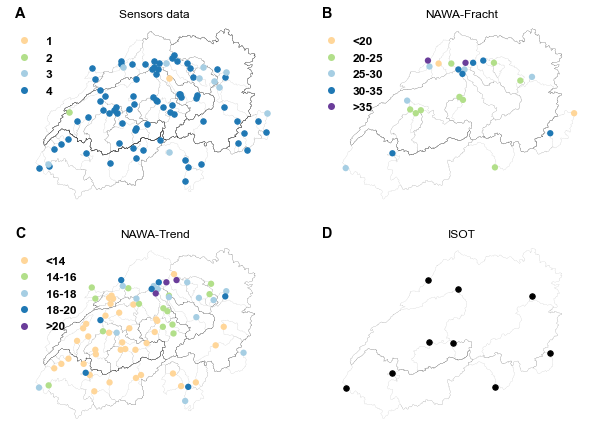

In [266]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows}
                        )
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]
text2_subplots = ["Sensors [-]", "24 stations", "76 stations", "9 stations"]

for i, variable in enumerate(variable_list):

    if variable == "count_bafu":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_bafu_df2.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_naduf":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_naduf_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_nawa":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_nawa_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_isot":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_isotopes_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    
    if variable == "count_isot":
        axs[i].scatter(counts_datasets_df[counts_datasets_df.count_isot.notna()]['lon'], counts_datasets_df[counts_datasets_df.count_isot.notna()]['lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=30, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        #ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("ISOT", loc="left", fontweight="bold")
    
    elif variable == "count_bafu":
        for color in df_bafu["color_bafu"].unique():
            subset_bafu = df_bafu[df_bafu['color_bafu'] == color]
            axs[i].scatter(subset_bafu['lon'], subset_bafu['lat'], color=color, alpha=1, s=30)
            axs[i].spines['top'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
            axs[i].spines['bottom'].set_visible(False)
            axs[i].spines['left'].set_visible(False)
            axs[i].set_xticks([])
            axs[i].set_yticks([])
            legend_title = color_mapping_list[variable][0]
            axs[i].set_title('A', loc="left", fontweight="bold")

        color_mapping = {'1': '#FFD699', '2': '#b2df8a', '3': '#a6cee3', '4': '#1f78b4'}
        legend_labels = ['1', '2', '3', '4']

        # Add circular legend
        handles = [
            Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], 
                markeredgecolor='none', markersize=7) for key in color_mapping
        ]

        # Create legend and adjust position
        legend = axs[i].legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="")
        legend.get_frame().set_linewidth(0)  # Remove legend frame
        legend.get_frame().set_facecolor('none')  # Transparent background
        legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position



    else:
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)
        legend_title = color_mapping_list[variable][0]
            
    
        axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    
    

    #river_ch.plot(ax=axs[i], linewidth=0.25)
        
    ## Add text in the lower-right corner
    #axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
    #        transform=axs[i].transAxes, fontsize=10)
    


axs[0].set_title("A", loc="left", fontweight="bold")
axs[0].set_title("Sensors data", loc="center", fontweight="normal", fontsize=12)

#axs[0].text(-0.00, 1, "Variables", verticalalignment='top', horizontalalignment='left',
#            transform=axs[0].transAxes, fontsize=12, fontweight="normal")
#
#axs[1].text(-0.005, 1, "NAWA-Fracht [-]", verticalalignment='top', horizontalalignment='left',
#            transform=axs[1].transAxes, fontsize=12)
#
#axs[2].text(-0.005, 1, "NAWA-Trend [-]", verticalalignment='top', horizontalalignment='left',
#            transform=axs[2].transAxes, fontsize=12)
#
#axs[3].text(-0.005, 1, "ISOT", verticalalignment='top', horizontalalignment='left',
#            transform=axs[3].transAxes, fontsize=12)

axs[1].set_title("B", loc="left", fontweight="bold")
axs[1].set_title("NAWA-Fracht", loc="center", fontweight="normal", fontsize=12)

axs[2].set_title("C", loc="left", fontweight="bold")
axs[2].set_title("NAWA-Trend", loc="center", fontweight="normal", fontsize=12)

axs[3].set_title("D", loc="left", fontweight="bold")
axs[3].set_title("ISOT", loc="center", fontweight="normal", fontsize=12)

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig1_4datasources.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

# Distance between obeservation points

In [40]:
network_camels_ch_chem.columns

Index(['gauge_id', 'sensor_id', 'nawaf_id', 'nawat_id', 'isot_id',
       'gauge_name', 'water_body_name', 'gauge_easting', 'gauge_northing',
       'gauge_lon', 'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'foen_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'foen_nawat_dist',
       'q_nawat_corrector', 'remarks', 'geometry'],
      dtype='object')

In [42]:
network_camels_ch_chem[network_camels_ch_chem.foen_nawaf_dist>0]

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,...,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks,geometry
14,2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,8.91,...,1613.3,10.2,Riazzino,713670.0,113500.0,1613.268070,0.0,0.999980,Q data calculated by id_2020 *1.12,POINT (8.910 46.160)
51,2243,2243.0,1836.0,1345.0,NaN,"Baden, Limmatpromenade",Limmat,665640,258690,8.31,...,2412.0,7.1,Turgi,661300.0,260850.0,2412.382874,6.7,1.007805,"Data merged with 2622, Gebenstorf, Limmat",POINT (8.310 47.480)
88,2462,2462.0,2064.0,2064.0,NIO06,S-chanf,Inn,795800,165910,10.00,...,616.0,3.0,S-chanf,795800.0,165910.0,615.950719,0.0,0.999920,Q data calculated by id_0403 *0.9,POINT (10.000 46.620)
89,2467,2467.0,1831.0,NaN,NaN,Gümmenen,Saane,585100,199240,7.24,...,1881.3,5.3,NaN,NaN,NaN,NaN,NaN,NaN,Q data from Laupen id_2215 without correction ...,POINT (7.240 46.940)
109,2613,2613.0,2078.0,2078.0,NIO08,"Weil, Palmrainbrücke (D)",Rhein,611740,272310,7.59,...,36404.4,7.2,"Weil, Palmrainbrücke",611740.0,272310.0,36404.416302,0.0,1.000000,"Q data from Basel, Rheinhalle id_2289 since 19...",POINT (7.590 47.600)


In [43]:
network_camels_ch_chem[network_camels_ch_chem.foen_nawat_dist>0]

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,...,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks,geometry
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,...,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,POINT (8.270 47.420)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,...,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN,POINT (8.090 46.750)
5,2029,2029.0,NaN,1142.0,NaN,"Brügg, Aegerten",Aare,588220,219020,7.28,...,NaN,NaN,Nidau,584709.0,219090.0,8243.100000,3.8,0.999333,NaN,POINT (7.280 47.120)
6,2030,2030.0,NaN,1145.0,NIO07,Thun,Aare,613230,179280,7.61,...,NaN,NaN,Thun Schadau,615219.0,177345.0,2451.536407,3.2,0.996843,NaN,POINT (7.610 46.760)
8,2034,2034.0,NaN,1432.0,NaN,"Payerne, Caserne d'aviation",Broye,561660,187320,6.94,...,NaN,NaN,Domdidier,566187.0,191947.0,428.900220,6.6,1.031258,NaN,POINT (6.940 46.840)
9,2044,2044.0,1823.0,1044.0,NaN,Andelfingen,Thur,693510,272500,8.68,...,1701.6,0.0,Vor ARA Andelfingen,693086.0,272856.0,1701.627120,0.6,1.000016,NaN,POINT (8.680 47.600)
11,2056,2056.0,NaN,4922.0,NaN,Seedorf,Reuss,690085,193210,8.62,...,NaN,NaN,"Attinghausen, Allmeinigärtli",690740.0,191720.0,818.855513,1.6,0.982784,NaN,POINT (8.620 46.880)
12,2063,NaN,NaN,1108.0,NaN,Murgenthal,Aare,629665,235150,7.83,...,NaN,NaN,Murgenthal,629760.0,235242.0,10059.355199,0.3,0.999996,NaN,POINT (7.830 47.270)
15,2070,2070.0,NaN,1162.0,NaN,Emmenmatt,Emme,623610,200420,7.75,...,NaN,NaN,"Emmenmatt, Mitte",623700.0,199790.0,230.974056,0.7,0.903547,Q is calculated by id_2070 minus id_2603,POINT (7.750 46.950)
19,2099,NaN,NaN,1053.0,NaN,"Zürich, Unterhard",Limmat,682055,249430,8.53,...,NaN,NaN,Hönggersteg,679609.0,250356.0,2186.067125,2.7,1.005597,NaN,POINT (8.530 47.390)


In [44]:
((network_camels_ch_chem.area_nawat - network_camels_ch_chem.area)/network_camels_ch_chem.area).max()

0.4199422502043134

<AxesSubplot:>

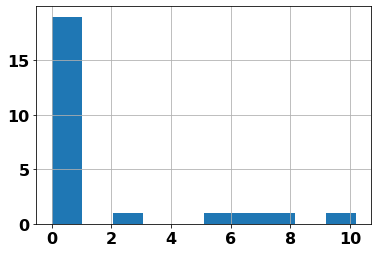

In [45]:
network_camels_ch_chem.foen_nawaf_dist.hist()

<AxesSubplot:>

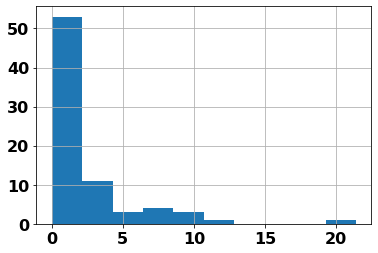

In [46]:
network_camels_ch_chem.foen_nawat_dist.hist()

In [47]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

In [276]:
network_camels_ch_chem_gdf.columns

Index(['sensor_id', 'nawaf_id', 'nawat_id', 'isot_id', 'gauge_name',
       'water_body_name', 'gauge_easting', 'gauge_northing', 'gauge_lon',
       'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'bafu_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'bafu_nawat_dist',
       'q_nawat_corrector', 'remarks', 'geometry', 'lat', 'lon'],
      dtype='object')

In [ ]:
network_camels_ch_chem_gdf = network_camels_ch_chem_gdf.set_index("gauge_id")

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks,geometry,lat,lon,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,POINT (6.89000 46.35000),46.35,6.89,-inf-0
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,POINT (8.19000 47.48000),47.48,8.19,-inf-0
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,POINT (8.27000 47.42000),47.42,8.27,5-10
2044,2044.0,1823.0,1044.0,NaN,Andelfingen,Thur,693510,272500,8.68,47.60,...,693086.0,272856.0,1701.627120,0.6,1.000016,NaN,POINT (8.68000 47.60000),47.60,8.68,0-2.5
2067,2067.0,1842.0,NaN,NaN,Martina,Inn,830640,197190,10.47,46.89,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.47000 46.89000),46.89,10.47,NaN
2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,8.91,46.16,...,713670.0,113500.0,1613.268070,0.0,0.999980,Q data calculated by id_2020 *1.12,POINT (8.91000 46.16000),46.16,8.91,-inf-0
2085,2085.0,1832.0,1832.0,NaN,Hagneck,Aare,580680,211650,7.18,47.06,...,580680.0,211650.0,5111.864285,0.0,0.999993,NaN,POINT (7.18000 47.06000),47.06,7.18,-inf-0
2091,2091.0,1827.0,NaN,NaN,"Rheinfelden, Messstation",Rhein,627190,267840,7.80,47.56,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (7.80000 47.56000),47.56,7.80,NaN
2106,2106.0,1828.0,2885.0,NaN,"Münchenstein, Hofmatt",Birs,613570,263080,7.62,47.52,...,613488.0,267376.0,896.869598,4.5,1.010785,NaN,POINT (7.62000 47.52000),47.52,7.62,2.5-5


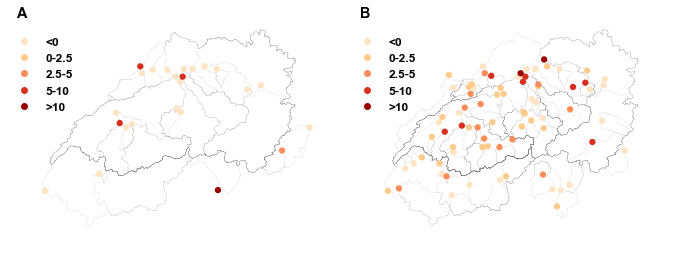

In [59]:
import math 
# List of variables
variable_list = ["foen_nawaf_dist", "foen_nawat_dist"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["NAWA-Fracht", "NAWA-Trend"]
legend_titles = ["A", "B"]
for i, variable in enumerate(variable_list):

    if variable == "foen_nawaf_dist":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf.foen_nawaf_dist.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "foen_nawat_dist":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf.foen_nawat_dist.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)


    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf)
    legend_title = legend_titles[i]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    
    #river_ch.plot(ax=axs[i], linewidth=0.1)
    
    # Add text in the lower-right corner
    #axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
    #    transform=axs[i].transAxes, fontsize=10)

#axs[0].set_title("Distance in km to NAWA-Fracht", loc="center", fontweight="normal", fontsize=12)
#axs[1].set_title("Distance in km to NAWA-Trend", loc="center", fontweight="normal", fontsize=12)

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_dist_nawaf_nawat.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [ ]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows}
                        )
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]
text2_subplots = ["Sensors [-]", "24 stations", "76 stations", "9 stations"]

for i, variable in enumerate(variable_list):

    if variable == "count_bafu":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_bafu_df2.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_naduf":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_naduf_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_nawa":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_nawa_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_isot":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_isotopes_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    
    if variable == "count_isot":
        axs[i].scatter(counts_datasets_df[counts_datasets_df.count_isot.notna()]['lon'], counts_datasets_df[counts_datasets_df.count_isot.notna()]['lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=30, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        #ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("ISOT", loc="left", fontweight="bold")
    
    elif variable == "count_bafu":
        for color in df_bafu["color_bafu"].unique():
            subset_bafu = df_bafu[df_bafu['color_bafu'] == color]
            axs[i].scatter(subset_bafu['lon'], subset_bafu['lat'], color=color, alpha=1, s=30)
            axs[i].spines['top'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
            axs[i].spines['bottom'].set_visible(False)
            axs[i].spines['left'].set_visible(False)
            axs[i].set_xticks([])
            axs[i].set_yticks([])
            legend_title = color_mapping_list[variable][0]
            axs[i].set_title('A', loc="left", fontweight="bold")

        color_mapping = {'1': '#FFD699', '2': '#b2df8a', '3': '#a6cee3', '4': '#1f78b4'}
        legend_labels = ['1', '2', '3', '4']

        # Add circular legend
        handles = [
            Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], 
                markeredgecolor='none', markersize=7) for key in color_mapping
        ]

        # Create legend and adjust position
        legend = axs[i].legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="")
        legend.get_frame().set_linewidth(0)  # Remove legend frame
        legend.get_frame().set_facecolor('none')  # Transparent background
        legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position



    else:
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)
        legend_title = color_mapping_list[variable][0]
            
    
        axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    
    

    #river_ch.plot(ax=axs[i], linewidth=0.25)
        
    ## Add text in the lower-right corner
    #axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
    #        transform=axs[i].transAxes, fontsize=10)
    


axs[0].set_title("A", loc="left", fontweight="bold")
axs[0].set_title("Sensors data", loc="center", fontweight="normal", fontsize=12)

#axs[0].text(-0.00, 1, "Variables", verticalalignment='top', horizontalalignment='left',
#            transform=axs[0].transAxes, fontsize=12, fontweight="normal")
#
#axs[1].text(-0.005, 1, "NAWA-Fracht [-]", verticalalignment='top', horizontalalignment='left',
#            transform=axs[1].transAxes, fontsize=12)
#
#axs[2].text(-0.005, 1, "NAWA-Trend [-]", verticalalignment='top', horizontalalignment='left',
#            transform=axs[2].transAxes, fontsize=12)
#
#axs[3].text(-0.005, 1, "ISOT", verticalalignment='top', horizontalalignment='left',
#            transform=axs[3].transAxes, fontsize=12)

axs[1].set_title("B", loc="left", fontweight="bold")
axs[1].set_title("NAWA-Fracht", loc="center", fontweight="normal", fontsize=12)

axs[2].set_title("C", loc="left", fontweight="bold")
axs[2].set_title("NAWA-Trend", loc="center", fontweight="normal", fontsize=12)

axs[3].set_title("D", loc="left", fontweight="bold")
axs[3].set_title("ISOT", loc="center", fontweight="normal", fontsize=12)

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig1_4datasources.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [115]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,lat,lon,geometry,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,46.35,6.89,POINT (6.89000 46.35000),-inf-0
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,593277.0,118449.0,3372.417040,0.0,1.000005,NaN,46.22,7.36,POINT (7.36000 46.22000),-inf-0
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,47.48,8.19,POINT (8.19000 47.48000),-inf-0
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,47.42,8.27,POINT (8.27000 47.42000),5-10
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,646692.0,177000.0,555.808970,3.3,1.001097,NaN,46.75,8.09,POINT (8.09000 46.75000),2.5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45,POINT (10.45000 46.63000),NaN
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35,POINT (8.35000 46.53000),NaN
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,47.07,8.28,POINT (8.28000 47.07000),0-2.5


In [122]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawaf_dist > 5].T

gauge_id,2068,2243,2467,2613
sensor_id,2068.0,2243.0,2467.0,2613.0
nawaf_id,1840.0,1836.0,1831.0,2078.0
nawat_id,1840.0,1345.0,NaN,2078.0
isot_id,NIO05,NaN,NaN,NIO08
gauge_name,Riazzino,"Baden, Limmatpromenade",Gümmenen,"Weil, Palmrainbrücke (D)"
water_body_name,Ticino,Limmat,Saane,Rhein
gauge_easting,713670,665640,585100,611740
gauge_northing,113500,258690,199240,272310
gauge_lon,8.91,8.31,7.24,7.59
gauge_lat,46.16,47.48,46.94,47.6


In [149]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawat_dist > 5].T

gauge_id,2018,2034,2202,2205,2215,2243,2288,2374,2387,2468
sensor_id,2018.0,2034.0,NaN,2205.0,NaN,2243.0,2288.0,2374.0,NaN,NaN
nawaf_id,1835.0,NaN,NaN,NaN,NaN,1836.0,NaN,NaN,NaN,NaN
nawat_id,1339.0,1432.0,1307.0,1344.0,1912.0,1345.0,1318.0,2991.0,6055.0,3006.0
isot_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gauge_name,Mellingen,"Payerne, Caserne d'aviation",Liestal,"Untersiggenthal, Stilli",Laupen,"Baden, Limmatpromenade","Neuhausen, Flurlingerbrücke","Mogelsberg, Aachsäge",Fürstenau,"St. Gallen, Bruggen / Au"
water_body_name,Reuss,Broye,Ergolz,Aare,Saane,Limmat,Rhein,Necker,Hinterrhein,Sitter
gauge_easting,662830,561660,622270,659970,584440,665640,689145,727110,753570,742540
gauge_northing,252580,187320,259750,263180,195300,258690,281975,247290,175730,253230
gauge_lon,8.27,6.94,7.73,8.23,7.23,8.31,8.63,9.12,9.45,9.33
gauge_lat,47.42,46.84,47.49,47.52,46.91,47.48,47.68,47.36,46.72,47.41


In [87]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawaf_dist > 10]

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,lat,lon,geometry,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,8.91,46.16,...,713670.0,113500.0,1613.26807,0.0,0.99998,Q data calculated by id_2020 *1.12,46.16,8.91,POINT (8.91000 46.16000),-inf-0


In [135]:
shapefiles_gve[shapefiles_gve.water_body=="Limmat"]

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry
23,1836,Gebenstorf,Limmat,373810.231279,nd_1836,0.0,None,0.0,None,373815.227518,...,0.307041,0.305740,0.306437,0.305883,0.308196,0.303180,0.300006,0.300360,0.301248,"POLYGON Z ((2663067.290 1262049.881 0.000, 266..."
110,0,None,Limmat,373810.231279,wq_2622,2622.0,Gebenstorf,0.0,None,373815.227518,...,0.307041,0.305740,0.306437,0.305883,0.308196,0.303180,0.300006,0.300360,0.301248,"POLYGON Z ((2663067.290 1262049.881 0.000, 266..."
155,0,None,Limmat,313677.751605,nw_1053,0.0,None,1053.0,Hönggersteg,313680.507100,...,0.310818,0.309529,0.310021,0.309522,0.312356,0.306332,0.302974,0.303615,0.304871,"POLYGON Z ((2680253.352 1251118.829 0.000, 268..."
167,0,None,Limmat,373810.231279,nw_1345,0.0,None,1345.0,Turgi,373815.227518,...,0.307041,0.305740,0.306437,0.305883,0.308196,0.303180,0.300006,0.300360,0.301248,"POLYGON Z ((2663067.290 1262049.881 0.000, 266..."


# Catchment areas

In [150]:
catchment1 = shapefiles_gve[shapefiles_gve.ID=="nw_3006"]
catchment1

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry
177,0,None,Sitter,99042.111955,nw_3006,0.0,None,3006.0,Leebrugg,99044.775553,...,0.777914,0.783966,0.783509,0.782939,0.785716,0.781568,0.78678,0.800819,0.800029,"POLYGON Z ((2744663.733 1258479.726 0.000, 274..."


In [151]:
catchment1_mghydro = shapefiles_gve[shapefiles_gve.ID=="wq_2468"]
catchment1_mghydro

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry


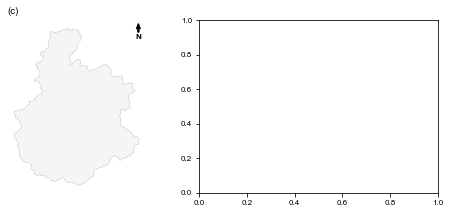

In [152]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'normal'  # Change label font weight (e.g., 'bold', 'normal')

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [1, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
catchment1_mghydro.plot(ax=axs[0], facecolor='lightsteelblue', edgecolor='black', linewidth=0.1)
catchment1.plot(ax=axs[0], facecolor='whitesmoke', edgecolor='black', linewidth=0.1)


#rivers_1.plot(ax=axs[0], linewidth=0.25)
#rivers_2.plot(ax=axs[0], linewidth=0.25)

#gauge1.plot(ax=axs[0], marker='o', color='white', markersize=5, edgecolor='black')

#minx, miny, maxx, maxy = 8.6, 46.3, 10.3, 47.3
#axs[0].set_xlim(minx, maxx) 
#axs[0].set_ylim(miny, maxy)  

axs[0].set_axis_off()  # Turn off both x-axis and y-axis

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Title and (a) label for the first subplot
axs[0].set_title('(c)', loc="left")

# Add a north arrow to the first subplot (axs[0])
arrow_length = 0.02
arrow_style = dict(facecolor='black', edgecolor='black', width=0.01, head_width=0.03, head_length=0.03)

# Add the arrow to the first subplot
axs[0].arrow(0.95, 0.95 - arrow_length, 0, arrow_length, **arrow_style, transform=axs[0].transAxes)


# Add 'N' text to the first subplot
axs[0].text(0.95, 0.95 - arrow_length - 0.03, 'N', ha='center', va='center', fontsize=8, fontweight='bold', color='black', transform=axs[0].transAxes)

fig.patch.set_facecolor('none')


#plt.rcParams.update({'font.size': 8})  # Change 18 to your desired font size

fig.tight_layout()

# Save or display the plot
#plt.show()
#fig.savefig('results/figure4cd.png', dpi=300,  bbox_inches='tight')

# Isotopes

100%|██████████| 9/9 [00:00<00:00, 193.37it/s]


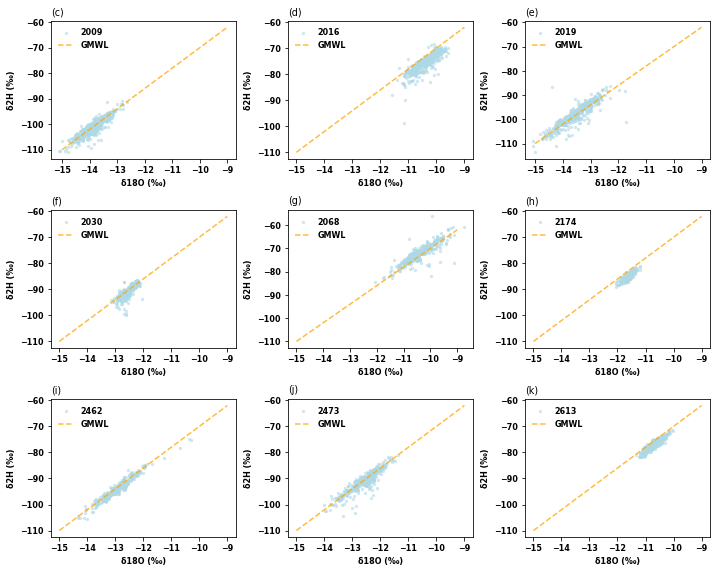

In [302]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tqdm


# Set font properties using rcParams
mpl.rcParams['font.family'] = 'helvetica'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Function to extract basin_id from the filename
def get_basin_id_from_filename(filename):
    basename = os.path.basename(filename)
    # Assuming the basin_id is the last part of the file name before ".csv"
    basin_id = basename.split('_')[-1].split('.')[0]
    return basin_id


# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize the number of rows and columns for subplots
num_plots = 9  # Number of subplots (e.g., 9)
nrows = 3  # 3 rows
ncols = 3  # 3 columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each CSV file and create a subplot
for i, file in enumerate(tqdm.tqdm(csv_files[:num_plots])):  # Only process the first 9 files
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Extract the basin_id
    basin_id = get_basin_id_from_filename(file)

    # Extract the relevant columns (assuming they are named 'delta_18o' and 'delta_2h')
    delta_18o = df['delta_18o']
    delta_2h = df['delta_2h']

    # Plot δ2H vs δ18O for your data on the current axis
    axes[i].scatter(delta_18o, delta_2h, label=f'{basin_id}', color='lightblue', marker='o', s=5, alpha=0.5)

    # Plot the Global Meteoric Water Line (GMWL) on the current axis
    gmwl_d18O = range(-15, -8)  # Adjust the range based on your δ18O values
    gmwl_d2H = [8 * d18O + 10 for d18O in gmwl_d18O]
    axes[i].plot(gmwl_d18O, gmwl_d2H, label='GMWL', color='orange', linestyle='--', alpha=0.75)

    # Set labels, title, and limits for each subplot
    axes[i].set_xlabel('δ18O (‰)')
    axes[i].set_ylabel('δ2H (‰)')
    axes[i].set_title(f'({chr(99+i)})', loc="left")
    #axes[i].grid(True)
    axes[i].legend(frameon=False)
    #axes[i].set_xlim(-15, -8)
    #axes[i].set_ylim(-110, -80)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_tv_isotopes.png', dpi=300, bbox_inches='tight')


In [279]:
file

'results/interval_samples/isotopes\\CAMELS_CH_Chem_isotopes_2613.csv'

# Means and correlations


2. Expected Relationships Between Variables
Here are some expected trends:

Conductivity (ec25_sensor, ec20_lab) should correlate with major ions like Na, Cl, SO4, Ca, Mg, and K.


pH (pH_lab, pH_sensor) should correlate with alkalinity (alk) and inversely with CO2 concentration.


Dissolved oxygen (O2C_sensor, O2S_sensor) should correlate with temperature (temp_sensor) (cooler water holds more oxygen).


Total Hardness (th) should correlate with Ca and Mg, since they define water hardness.


Total Nitrogen (tn) should correlate with NO3_N, since nitrate is a major nitrogen form.


Total Phosphorus (tp) should correlate with tfp and drp, as these represent phosphorus forms.

In [361]:
mean_naduf_df.corr()["ec25_lab"]

KeyError: 'ec25_lab'

In [358]:
mean_naduf_df.corr()

,alk,As,Ba,Br,Cd,Ca,Cl,Cr,Cu,doc,...,Sr,SO4,tfp,th,tn,toc,tp,tss,temp_online,Zn
alk,1.000000,NaN,1.0,0.064030,0.052686,0.935123,0.644829,0.120768,0.699116,0.872686,...,-1.0,-0.745141,0.780126,0.957781,0.793658,0.902414,0.550651,-0.076829,0.437707,0.466232
As,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba,1.000000,NaN,1.0,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,...,-1.0,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000
Br,0.064030,NaN,1.0,1.000000,-0.279405,0.110019,0.085425,0.066195,0.067916,0.027269,...,-1.0,-0.061105,0.104223,0.047505,0.031156,0.072665,0.014728,-0.003815,0.125813,0.023647
Cd,0.052686,NaN,-1.0,-0.279405,1.000000,0.013801,0.438018,0.303695,0.321841,0.242744,...,1.0,0.229211,0.480046,0.181062,0.403403,0.248344,0.636060,0.151326,-0.379191,0.217440
Ca,0.935123,NaN,1.0,0.110019,0.013801,1.000000,0.517299,0.203261,0.823844,0.800191,...,-1.0,-0.587198,0.680179,0.938992,0.708273,0.835987,0.451778,-0.096819,0.363232,0.676433
Cl,0.644829,NaN,1.0,0.085425,0.438018,0.517299,1.000000,0.289925,0.537858,0.574459,...,-1.0,-0.323757,0.778340,0.705552,0.921254,0.535427,0.829605,-0.115412,0.465071,0.175681
Cr,0.120768,NaN,-1.0,0.066195,0.303695,0.203261,0.289925,1.000000,0.633289,0.035847,...,1.0,-0.021610,0.210702,0.170666,0.237632,0.320188,0.526395,0.847666,-0.140797,0.524992
Cu,0.699116,NaN,-1.0,0.067916,0.321841,0.823844,0.537858,0.633289,1.000000,0.453293,...,1.0,-0.311027,0.585045,0.768812,0.726747,0.695971,0.763690,0.318403,0.093969,0.888335
doc,0.872686,NaN,1.0,0.027269,0.242744,0.800191,0.574459,0.035847,0.453293,1.000000,...,-1.0,-0.745452,0.788950,0.785605,0.676137,0.902369,0.508065,-0.226407,0.467135,0.186563


In [362]:
mean_nawa_df.corr()

,Cl,NH4_N,NO2_N,NO3_N,O2S_online,O2_lab,O2_online,doc,drp,ec25_lab,...,pH_online,q_max_kanton,q_mean_kanton,q_mean_online,q_min_kanton,temp_lab,temp_online,tn,tp,turbidity_online
Cl,1.000000,0.443055,0.410677,0.803744,0.190321,-0.197873,-0.105408,0.747454,0.781201,0.739355,...,0.472083,-0.143408,-0.050084,-0.071730,-0.106842,0.395402,0.426408,0.782332,0.512500,-0.029232
NH4_N,0.443055,1.000000,0.590359,0.369788,-0.249505,-0.196866,0.308678,0.271518,0.350398,0.291744,...,-0.213356,-0.008602,-0.064433,-0.032498,-0.023796,0.026902,-0.010859,0.429192,0.520790,0.376777
NO2_N,0.410677,0.590359,1.000000,0.395590,0.037764,-0.107672,-0.018202,0.311592,0.334832,0.239879,...,0.208442,-0.068230,-0.062870,-0.066562,-0.078091,0.209770,0.223595,0.541324,0.297101,-0.317320
NO3_N,0.803744,0.369788,0.395590,1.000000,0.176078,-0.103160,-0.201440,0.729483,0.797048,0.771938,...,0.472069,-0.173008,-0.130570,-0.176900,-0.140018,0.317431,0.366065,0.995802,0.453092,-0.987082
O2S_online,0.190321,-0.249505,0.037764,0.176078,1.000000,0.283027,0.374169,0.344150,0.202250,0.098977,...,0.189510,-0.073491,-0.167447,-0.062600,0.065146,0.193723,0.198845,0.241028,-0.280596,-0.866053
O2_lab,-0.197873,-0.196866,-0.107672,-0.103160,0.283027,1.000000,0.972805,-0.267060,-0.186500,-0.008075,...,0.213361,-0.268052,-0.115586,-0.205476,-0.286428,-0.705513,-0.678797,-0.086821,0.147764,0.945895
O2_online,-0.105408,0.308678,-0.018202,-0.201440,0.374169,0.972805,1.000000,-0.318529,-0.217902,-0.186317,...,-0.131913,0.095894,-0.303042,-0.238096,-0.289421,-0.465946,-0.468148,-0.113937,0.357503,0.984153
doc,0.747454,0.271518,0.311592,0.729483,0.344150,-0.267060,-0.318529,1.000000,0.578126,0.705372,...,0.523086,-0.205799,-0.106156,-0.168985,-0.143309,0.432248,0.410982,0.706720,0.250327,-0.924357
drp,0.781201,0.350398,0.334832,0.797048,0.202250,-0.186500,-0.217902,0.578126,1.000000,0.596645,...,0.321098,-0.172204,-0.116940,-0.145967,-0.143130,0.211377,0.301271,0.760767,0.596347,-0.733145
ec25_lab,0.739355,0.291744,0.239879,0.771938,0.098977,-0.008075,-0.186317,0.705372,0.596645,1.000000,...,0.481717,-0.157795,-0.095819,-0.149027,-0.115579,0.270967,0.390251,0.769417,0.363832,-0.760161


In [363]:
mean_nawa_df

,Cl,NH4_N,NO2_N,NO3_N,O2S_online,O2_lab,O2_online,doc,drp,ec25_lab,...,pH_online,q_max_kanton,q_mean_kanton,q_mean_online,q_min_kanton,temp_lab,temp_online,tn,tp,turbidity_online
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,13.307034,0.114534,0.013521,0.600873,100.585838,11.424576,11.469410,0.775237,0.006212,337.622414,...,8.162552,NaN,NaN,170.288495,NaN,7.805678,7.760127,0.822000,0.122316,135.064382
2011,11.051102,0.177892,0.020400,0.634850,NaN,11.045217,NaN,0.961833,0.010233,294.608333,...,NaN,NaN,102.870000,101.912948,NaN,7.429386,6.957208,NaN,0.150142,NaN
2016,10.625126,0.025924,0.011479,1.572101,101.216317,10.501770,10.513754,1.749580,0.014252,379.857143,...,8.061395,NaN,368.750000,297.063397,NaN,12.453805,12.454387,1.692437,0.040991,NaN
2018,6.119417,0.031300,0.008875,0.873050,105.177690,10.458333,10.702586,1.612417,0.008742,267.475000,...,8.250862,151.029861,136.965000,135.308479,127.560278,12.567500,12.539650,1.048750,0.025158,NaN
2019,1.150698,0.018333,0.004792,0.324885,NaN,11.825000,NaN,0.536385,0.005146,115.151042,...,NaN,NaN,NaN,42.696556,NaN,6.592708,6.365885,0.435750,0.044656,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,8.070000,0.030176,0.008874,1.867983,NaN,NaN,NaN,2.151532,0.014890,436.655462,...,NaN,NaN,1.688125,1.560876,NaN,9.307627,9.594296,1.996949,0.058136,NaN
2610,3.365750,0.019650,0.004817,1.804000,NaN,10.823333,NaN,1.813417,0.010575,412.325000,...,NaN,NaN,1.476917,1.468095,NaN,9.687500,NaN,2.108448,0.030856,NaN
2613,11.949583,0.040083,0.011400,1.234583,102.307529,10.674038,10.624882,1.787500,0.013883,354.028846,...,8.059933,NaN,1533.800000,1038.862909,NaN,13.065690,13.023550,1.399000,0.042925,9.501667


# End